# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
file_link= '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/real_estate_data.csv'
# file_link='/datasets/real_estate_data.csv'
data = pd.read_csv(file_link, sep='\t')

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

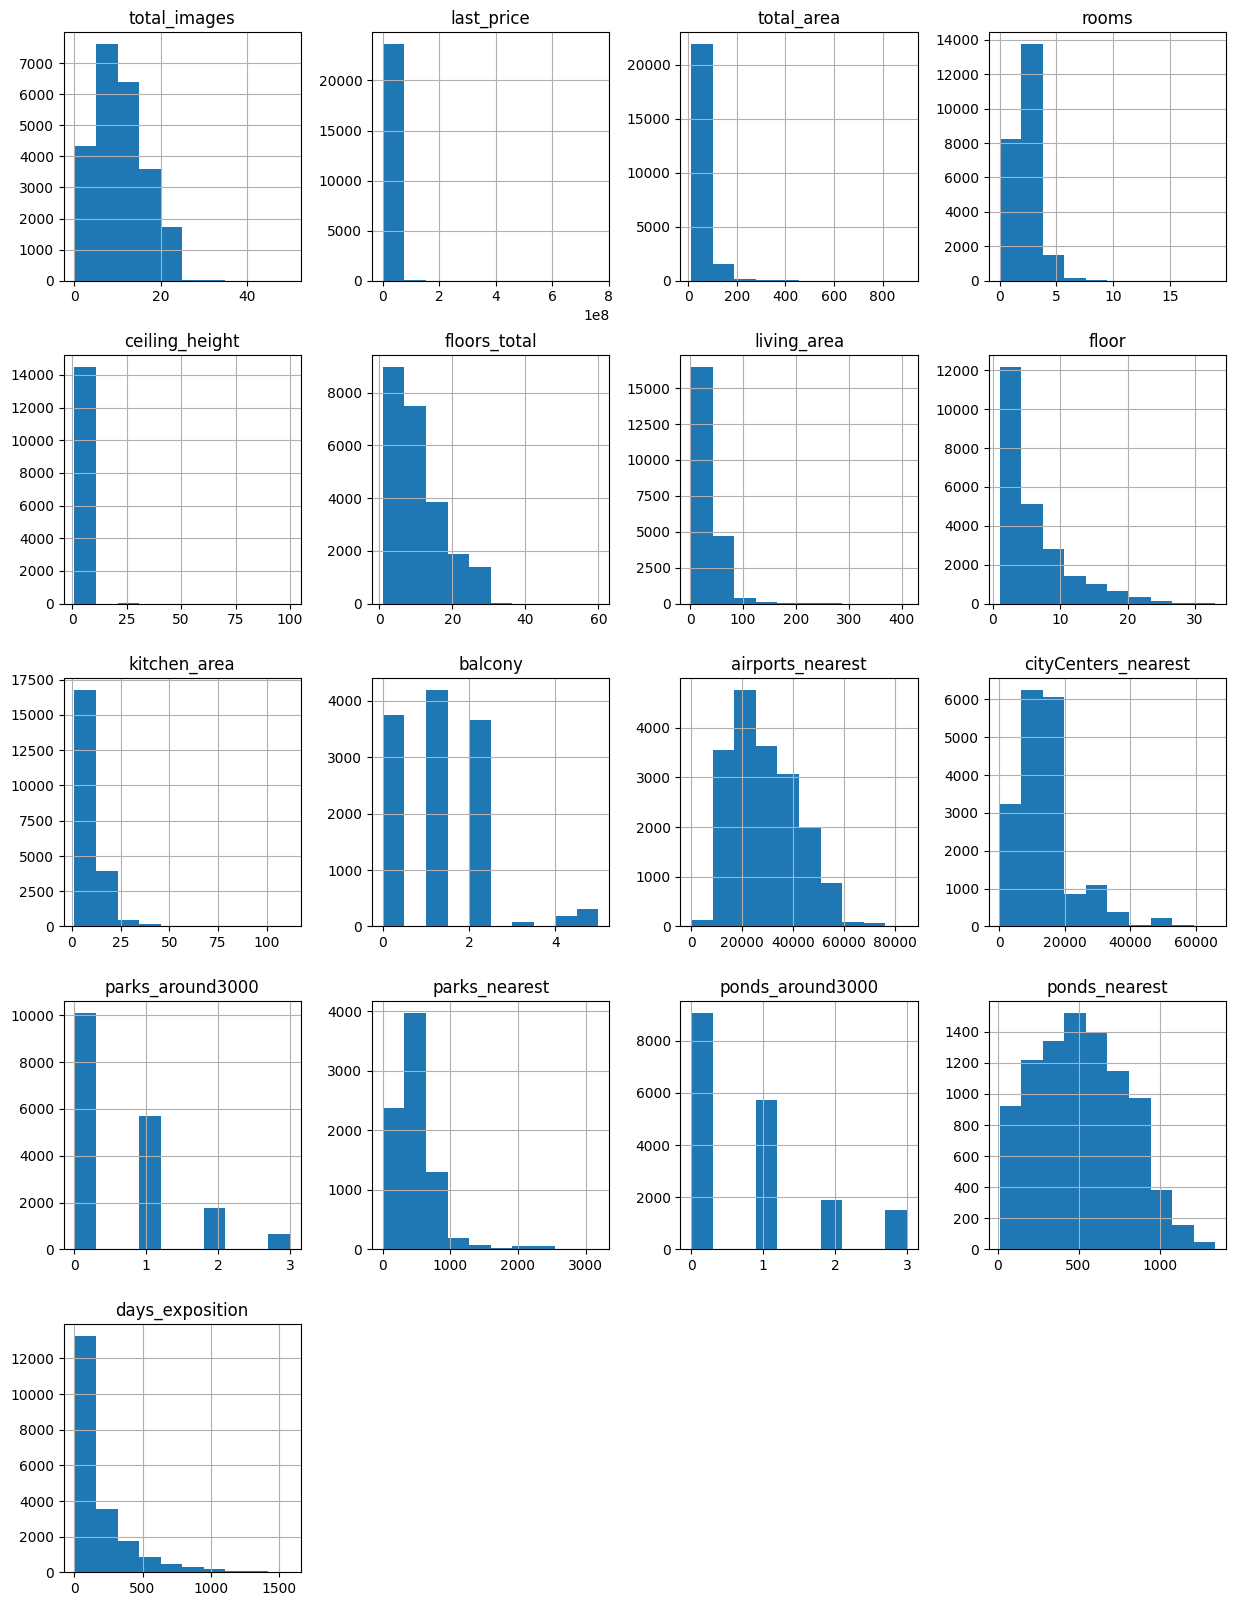

In [5]:
# построим гистограммы всех числовых столбцов на едином графике

data.hist(figsize=(15, 20))

### Предобработка данных

найдем все пропуски в данных 

In [6]:
# выведем только те столбцы, в которых есть пропуски и укажем количество пропусков
data.isna().sum().\
    reset_index().rename(columns={0: 'num_nan', 'index': 'col_name'}).\
        query('num_nan >0')

,col_name,num_nan
5,ceiling_height,9195
6,floors_total,86
7,living_area,1903
9,is_apartment,20924
12,kitchen_area,2278
13,balcony,11519
14,locality_name,49
15,airports_nearest,5542
16,cityCenters_nearest,5519
17,parks_around3000,5518


In [7]:
# посмотрим какие значения встречаются в графе is_apartment, кроме пустых значений
data[~data.is_apartment.isna()].is_apartment.unique()

array([False, True], dtype=object)

In [8]:
# посмотрим сколько этих значений
data.groupby('is_apartment').agg({'total_images': 'count'}).rename(columns={'total_images': 'amount'})

,amount
is_apartment,
False,2725
True,50


Вывод: пустые объекты могут быть как апартаментами, так и нет (дом, квартира)

Теперь посмотрим что с графой "Ближайший аэропорт"

array([[<AxesSubplot: title={'center': 'num_nan_by_local'}>]],
      dtype=object)

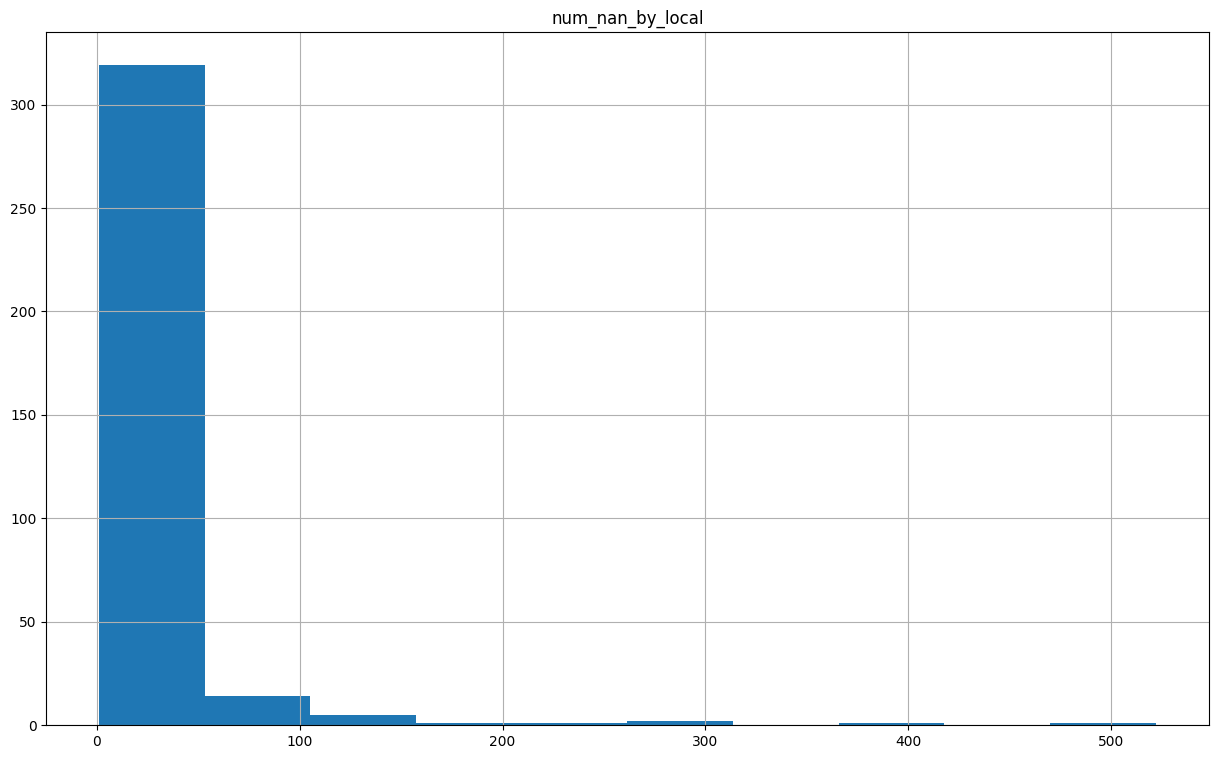

In [9]:
# посмотрим как распределяется число незаполненных значений в столбце 
# "расстояние до ближайшего аэропорта" для всех населенных пунктов

data[data.airports_nearest.isna()].groupby('locality_name').agg({'total_images':'count'}).\
    rename(columns={'total_images': 'num_nan_by_local'}).hist(figsize=(15,9))
    #sort_values('total_images', ascending=False)

Получается, что самое часто количество пропусков - от 0 до 50 для разных населенных пунктов.

Посмотрим что за локации у этих объектов

In [10]:
data[data.airports_nearest.isna()].groupby('locality_name').agg({'total_images':'count'}).\
    rename(columns={'total_images': 'num_nan_by_local'}).\
    sort_values('num_nan_by_local', ascending=False)\
    .query('num_nan_by_local <=50')

,num_nan_by_local
locality_name,
Тихвин,49
поселок Бугры,45
посёлок Тельмана,39
поселок Романовка,36
Волосово,36
...,...
поселок Гладкое,1
поселок Дружноселье,1
поселок Жилгородок,1


In [11]:
# даже если объект располагается в Питере, у него есть пропуск в расстоянии до аэропорта
data[data.airports_nearest.isna()].\
    groupby('locality_name').agg({'total_images':'count'}).\
    rename(columns={'total_images': 'num_nan_by_local'}).\
    sort_values('num_nan_by_local', ascending=False)\
    .query('index == "Санкт-Петербург"')

,num_nan_by_local
locality_name,
Санкт-Петербург,85


вывод напишем в общем списке

<font color='red'>ВЫВОД по пропускам</font>

проанализируем возможные причины пропусков:

1) высота потолков, всего этажей, жилая площадь, площадь кухни, название локации , - явно не может быть пустой, очевидно данные просто утеряны/не заполнены изначально, пока оставим пропуск

2) число балконов - скорее всего, этих балконов нет (будем менять пропуски на 0)

3) расстояние до ближайшего аэропорта - видимо, это значение слишком большое или не было определено: судя по названию населенных пунктов, у которых есть пропуски в графе расстояния до аэропорта, это не только деревни, но и сам Питер.
Пока непонятно, что с ними делать, отложим 

4) является_апартаментами - тут интереснее: очень много пропусков (20924 объекта) - информация явно может быть важной, 2725 объектов точно не апартаменты, 50 - точно апартаменты

Удалять пропуски по графе is_apartment нельзя, менять их на ноль тоже нельзя. 

5) расстояние до центра города - тема может быть важной только для крупных городов. 
что можно сделать:
- взять все уникальные названия населенных пунктов
- отфильтровать все, у которых нет в названии "село" или "деревня" 
- запросить информацию по числу населения, выбрать границу, по которой стоит считать город крупным
- дл крупных городов - проставить медианное значение по всем крупным городам на пропусках растояния до центра
- для мелких городов - поставить медианное значение по всем мелким городам
- для сел и деревень - проставить значение 0

Так как запрашивать информацию по крупным/мелким городам не у кого - пропуски не трогаем

6) по паркам и прудам - поставить значение 0 (скорее всего или их нет, или ближайшие настолько далеко, что считать это за важную информацию не стоит)

7) дней выставляется - поставить значение 0 (скорее всего, объект только что выставили на Яндекс.Недвижимости)

In [12]:
# заполняем пропуски в балконах

data.balcony= data.balcony.fillna(0)

In [13]:
# проверям, что все пропуски по балконам ушли
data.balcony.isna().sum()

0

In [14]:
# заполняем пропуски в графах по паркам и прудам - ставим 0
data.parks_around3000 = data.parks_around3000.fillna(0)
data.parks_nearest = data.parks_nearest.fillna(0)
data.ponds_around3000 = data.ponds_around3000.fillna(0)
data.ponds_nearest = data.ponds_nearest.fillna(0)

In [15]:
# убираем пропуски в столбце "дней выставляется"
data.days_exposition= data.days_exposition.fillna(0)

In [16]:
# проверяем, что все пропуски в столбцах заполнены, кроме оговоренных в выводе выше

data.isna().sum().\
    reset_index().rename(columns={0: 'num_nan', 'index': 'col_name'})

,col_name,num_nan
0,total_images,0
1,last_price,0
2,total_area,0
3,first_day_exposition,0
4,rooms,0
5,ceiling_height,9195
6,floors_total,86
7,living_area,1903
8,floor,0
9,is_apartment,20924


Возможно , нужно изменить типы данных. посмотрим на них еще раз

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [18]:
data.floors_total.unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [19]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

In [20]:
data.balcony.unique()

array([0., 2., 1., 5., 4., 3.])

Отдельно пощупаем значения в столбце "дней выставляется" - а есть ли там дробные значения вообще или только целые дни?

по идее, должны быть только целые значения

In [21]:
# проверим, есть ли дробная часть у любого значения:
# - превратим значение в строку
# - разобьем его по точке
# - возьмем только ту часть, что после точки (дробную часть)
# - проверим ее на то, что она не явлется нулем
str(data.days_exposition[1]).split('.')[1]!='0'

False

In [22]:
# теперь проверим на всех значениях в столбце
def is_float(val):
    return str(val).split('.')[1]!='0'

data.days_exposition.apply(is_float).sum()

3997

ух ты! почти 4000 значений дней с дробной частью! очень странные значения))

можно заодно посмотреть что это за значения

In [23]:
data[data.days_exposition.apply(is_float)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,0.0,0.0,0.0,0.0,90.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,NaN,...,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
41,16,7900000.0,74.00,2016-05-04T00:00:00,3,NaN,14.0,59.00,8,False,...,12.00,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
43,13,9330000.0,48.00,2017-01-10T00:00:00,2,3.00,4.0,28.00,4,NaN,...,7.50,0.0,Санкт-Петербург,15016.0,10822.0,0.0,0.0,1.0,492.0,763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23675,8,3550000.0,39.50,2016-10-03T00:00:00,1,NaN,16.0,19.00,13,NaN,...,8.50,0.0,Санкт-Петербург,25740.0,14951.0,0.0,0.0,0.0,0.0,721.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,0.0,0.0,0.0,0.0,45.0
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.00,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.00,12,NaN,...,15.00,0.0,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,0.0,23.0


Хм, значения в столбце "дней выставлено" все равно очень напоминает целочисленные значения

посмотрим на любое из этих чисел подробнее

In [24]:
data.iloc[8].days_exposition

189.00000000000003

ага, теперь все ясно - какая-то механическая ошибка создает число не равное нулю в далеком порядке.

ок, значит можно весь столбец привести к типу int 

<font color='red'>Вывод: </font>

1) нужно изменить столбец first_day_exposition на datetime 
2) floors_total - можно заменить на int (не сможем этого сделать, пока там есть пустые значения)
3) is_apartment заменить на bool не можем, потому что есть пустые значения
4) balcony - можно заменить на int (не сможем этого сделать, пока там есть пустые значения)
5) days_exposition - приводим к типу int 
6) остальные столбцы не трогаем

In [25]:
# меняем столбец с датами
data.first_day_exposition = pd.to_datetime(data.first_day_exposition)

In [26]:
# меняем столбец days_exposition на int 
data.days_exposition = data.days_exposition.astype(int)

Проверяем изменени типов

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Посмотрим как обстоят дела с неявными дубликатами в столбце "Название локации"

In [28]:
# сначала посмотрим сколько и каких значений есть в столбце

data.groupby('locality_name').agg({'total_images': 'count'}).\
    rename(columns={'total_images': 'num_names'}).\
    sort_values('num_names')\
        #.query('num_names == 1')\
    #.reset_index().\
    #locality_name.unique()

,num_names
locality_name,
поселок Жилгородок,1
деревня Тойворово,1
деревня Трубников Бор,1
деревня Хапо-Ое,1
деревня Хязельки,1
...,...
Пушкин,369
Всеволожск,398
посёлок Шушары,440


In [29]:
# убедимся, что учтены все уникальные значения (выведем число уникальных значений)
data.locality_name.nunique()

364

ок, все верно. как найти те, что практически совпадают по названию?

Предположим, что дублируются только названия по типу населенного пукнта: поселок-посёлок

Мы точно знаем, что тип населенного пункта написан с маленькой буквы, а название - с большой, поэтому трогать регистр не будем

In [30]:
# приведем все к нижнему регистру , заменим везде ё на е и снова посмотрим 
 # сколько значений у нас будет для каждого населенного пункта

data.locality_name.\
    str.replace('ё', 'е')\
    .reset_index()\
    .groupby('locality_name').agg({'index': 'count'}).\
    rename(columns={'index': 'num_names'})\
    .sort_values('num_names')\
    

,num_names
locality_name,
коттеджный поселок Счастье,1
деревня Сижно,1
деревня Снегиревка,1
деревня Старое Хинколово,1
деревня Терпилицы,1
...,...
Пушкин,369
Всеволожск,398
поселок Шушары,440


избавились от 34 дубликатов

но как быть с неявными дубликатами в названиях (например, если тип населенного пункта прописан длиннее в одном случае, а в другом - короче?)

In [31]:
# сначала сохраним результат работы замены буквы "ё" на "е"
data.locality_name = data.locality_name.\
    str.replace('ё', 'е')

In [32]:
# для удобства поиска совпадающих названий населенных пунктов сделаем сортировку именно по нему

# для этого создадим функцию, которая будет разбивать строку по пробелу 
# и будем из полученного списка брать только последнее слово - это и будет название нашего населенного пункта

def sort_by_title_word(string):
    return string.split(' ')[-1]



In [33]:
# сортируем список с ключом - функцией
sorted(data.locality_name.dropna().unique(), key=sort_by_title_word)

['деревня Агалатово',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'деревня Аро',
 'поселок Барышево',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'деревня Белогорка',
 'поселок Белоостров',
 'Бокситогорск',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'деревня Чудской Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'поселок Пансионат Зеленый Бор',
 'поселок Бугры',
 'городской поселок Будогощь',
 'деревня Ваганово',
 'поселок городского типа Важины',
 'деревня Вартемяги',
 'деревня Малое Верево',
 'поселок станции Вещево',
 'поселок при железнодорожной станции Вещево',
 'городской поселок Виллози',
 'поселок городского типа Вознесенье',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'деревня Большая Вруда',
 'Всеволожск',
 'Выборг',
 'поселок городского типа Вырица',
 'деревня Выскатка',
 'поселок Высокоключевой',
 'Высоцк',
 'поселок Гаврилово',
 'д

теперь, пробежавшись по всему списку легко увидеть неявные дубликаты (сверяясь с <font color='red'>яндекс.картой</font>):

- 'поселок станции Вещево','поселок при железнодорожной станции Вещево' (правим на второй вариант)

-  'деревня Гарболово','поселок Гарболово' (правим на деревню)

- 'поселок станции Громово' , 'поселок Громово' (правим на первый вариант)

-  'поселок Зимитицы','деревня Зимитицы' (первый вариант)

-  'городской поселок Большая Ижора', 'поселок городского типа Большая Ижора' (второй вариант)

- 'деревня Калитино','поселок Калитино' (второй вариант)

-  'деревня Кудрово','Кудрово' (второй вариант)

- 'городской поселок Лесогорский','поселок городского типа Лесогорский' (второй вариант)

-  'городской поселок Мга','поселок городского типа Мга' (первый вариант)

-  'поселок Мурино','Мурино' (второй вариант)

-  'городской поселок Назия','поселок городского типа Назия' (второй вариант)

-  'Никольское','село Никольское' (первый вариант)

- 'городской поселок Павлово','поселок городского типа Павлово' (первый вариант)

-  'поселок станции Приветнинское','поселок при железнодорожной станции Приветнинское' (второй вариант)

-  'поселок городского типа Рощино','городской поселок Рощино' (второй вариант)

-  'поселок Рябово','поселок городского типа Рябово' - <font color='red'>не являются дубликатами!</font> (пользуйте яндекс.карты)

- 'поселок городского типа Советский','городской поселок Советский' (первый вариант)


In [34]:
# окей, меняем названия, устраняя неявные дубликаты

data.locality_name = data.locality_name.str.replace('поселок станции Вещево','поселок при железнодорожной станции Вещево')

data.locality_name = data.locality_name.str.replace('поселок Гарболово','деревня Гарболово')

data.locality_name = data.locality_name.str.replace('поселок Громово', 'поселок станции Громово')

data.locality_name = data.locality_name.str.replace('деревня Зимитицы', 'поселок Зимитицы')

data.locality_name = data.locality_name.str.replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')

data.locality_name = data.locality_name.str.replace('деревня Калитино','поселок Калитино')

data.locality_name = data.locality_name.str.replace('деревня Кудрово','Кудрово')

data.locality_name = data.locality_name.str.replace('городской поселок Лесогорский','поселок городского типа Лесогорский')

data.locality_name = data.locality_name.str.replace('поселок городского типа Мга','городской поселок Мга')

data.locality_name = data.locality_name.str.replace('поселок Мурино','Мурино')

data.locality_name = data.locality_name.str.replace('городской поселок Назия','поселок городского типа Назия')

data.locality_name = data.locality_name.str.replace('село Никольское','Никольское')

data.locality_name = data.locality_name.str.replace('поселок городского типа Павлово' , 'городской поселок Павлово')

data.locality_name = data.locality_name.str.replace('поселок станции Приветнинское','поселок при железнодорожной станции Приветнинское')

data.locality_name = data.locality_name.str.replace('поселок городского типа Рощино','городской поселок Рощино')

data.locality_name = data.locality_name.str.replace('городской поселок Советский','поселок городского типа Советский')

In [35]:
# проверям итог
data.locality_name.nunique()

314

убрали еще 16 неявных дубликатов. 

Итого избавились от 50 неявных дубликатов. ок

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
# цена квадратного метра
data['price_per_sq_m'] =  round(data.last_price / data.total_area, 2)

In [37]:
# день недели, месяц, год публикации
data['weekday_fd_exp'] = data.first_day_exposition.dt.weekday
data['month_fd_exp'] = data.first_day_exposition.dt.month
data['year_fd_exp'] = data.first_day_exposition.dt.year



In [38]:
# создадим вспомогтальные столбцы (необязательно) с булевыми значениями
data['is_first_floor'] = data.floor == 1
data['is_last_floor'] = (data.floor == data.floors_total) & (data.floor !=1)
data['is_another_floor'] = (~data.is_first_floor) & (~data.is_last_floor)

In [39]:
# создаем вспомогательную функцию замены значений в столбце
def group_by_floor(row):
    if row.is_first_floor: return 'первый'
    if row.is_last_floor: return 'последний'
    if row.is_another_floor: return 'другой'


In [40]:
# применяем функцию для указания типа этажа квартиры (значения — «первый», «последний», «другой»)
data['grouped_by_floor'] = data.apply(group_by_floor, axis=1)


In [41]:
# проверяем
data[['floors_total', 'floor', 'is_first_floor', 'is_last_floor','is_another_floor','grouped_by_floor']]

,floors_total,floor,is_first_floor,is_last_floor,is_another_floor,grouped_by_floor
0,16.0,8,False,False,True,другой
1,11.0,1,True,False,False,первый
2,5.0,4,False,False,True,другой
3,14.0,9,False,False,True,другой
4,14.0,13,False,False,True,другой
...,...,...,...,...,...,...
23694,5.0,3,False,False,True,другой
23695,5.0,4,False,False,True,другой
23696,3.0,1,True,False,False,первый
23697,17.0,12,False,False,True,другой


In [42]:
# на всякий случай убедимся, что присутствуют все три типа этажей

temp_df= data.groupby('grouped_by_floor').agg({'floor':'count'}).rename(columns={'floor': 'num_apartments'})

temp_df.loc['total']= temp_df.num_apartments.sum()
temp_df

,num_apartments
grouped_by_floor,
другой,17446
первый,2917
последний,3336
total,23699


Отлично, строчки не потеряли (всего 23699 значений так и осталось)

In [43]:
# дропнем лишние столбцы
data= data.drop(['is_first_floor', 'is_last_floor','is_another_floor'], axis=1)

In [44]:
# расстояние до центра города в километрах
data.cityCenters_nearest=  round(data.cityCenters_nearest/1000, 0)

In [45]:
# проверим^ что добавили все столбцы
data[['first_day_exposition','price_per_sq_m', 'weekday_fd_exp',
       'month_fd_exp', 'year_fd_exp', 'floor' ,'grouped_by_floor', 'cityCenters_nearest' ]]

,first_day_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,floor,grouped_by_floor,cityCenters_nearest
0,2019-03-07,120370.37,3,3,2019,8,другой,16.0
1,2018-12-04,82920.79,1,12,2018,1,первый,19.0
2,2015-08-20,92785.71,3,8,2015,4,другой,14.0
3,2015-07-24,408176.10,4,7,2015,9,другой,7.0
4,2018-06-19,100000.00,1,6,2018,13,другой,8.0
...,...,...,...,...,...,...,...,...
23694,2017-03-21,72490.85,1,3,2017,3,другой,4.0
23695,2018-01-15,52542.37,0,1,2018,4,другой,NaN
23696,2018-02-11,44091.71,6,2,2018,1,первый,NaN
23697,2017-03-28,149511.40,1,3,2017,12,другой,10.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<font color='red'>Вывод:</font> нужные столбцы добавлены, данные не потеряли

### Проведите исследовательский анализ данных

Займемся анализом данных по каждому столбцу - попробуем выявить лишние/аномальные значения

    1) столбец общая жилплощадь

<AxesSubplot: >

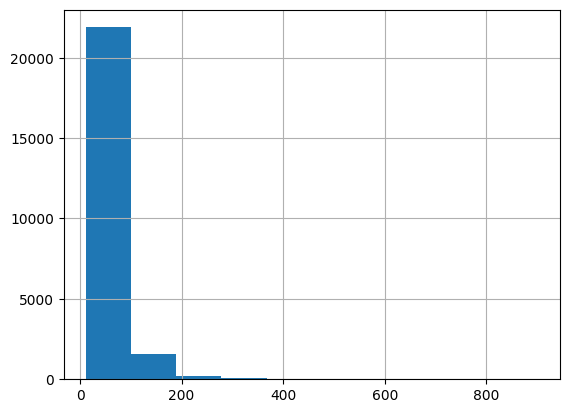

In [47]:
data.total_area.hist()

Так, сразу понятно, что наименьшее число площадей приходится на очень маленькие значения (близкие к нулю) и на очень большие (более 200 м2)

ну что ж, это логично.

Посмотрим на гистограмму поближе

<AxesSubplot: >

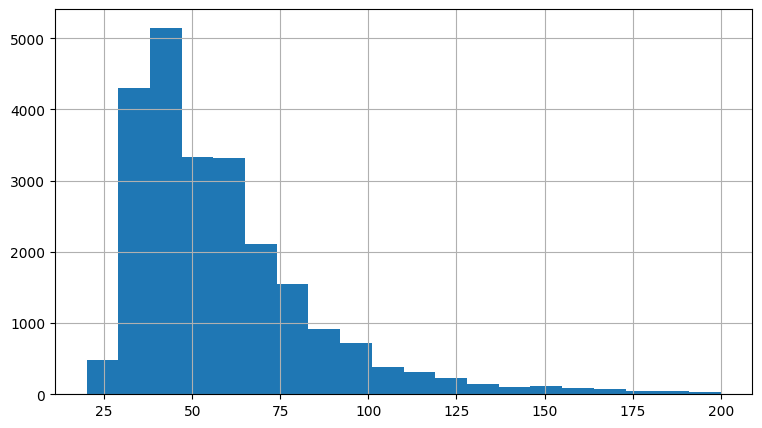

In [48]:
data.total_area.hist(bins= 20, range=(20,200), figsize=(9,5))

видим, что наименьшие значения площади лежат в диапазоне от 10 до 25 м2, наибольшие - от 150 м2 и выше

In [49]:
# можно посмотреть минимальное и максимальное значение самых редких значений площадей
data.groupby('total_area').agg({'total_images':'count'}).\
    rename(columns={'total_images': 'num_apartments'}).sort_values('num_apartments').\
    query('num_apartments==1').sort_index()

,num_apartments
total_area,
12.0,1
13.2,1
14.0,1
15.5,1
16.0,1
...,...
590.0,1
618.0,1
631.0,1


что ж, к маленьким площадям вопросов пожалуй нет, а вот к большим площадям - есть.

очевидно, что где-то между площадями в 150 и 900 м2 могут быть ошибочно записанные площади. 

проверить это можно по стоимости квартиры

In [50]:
#data[150<data.total_area <=900]

df_check_area = data.query('150<total_area <=900')\
    [['total_area', 'last_price']]\
    .sort_values('total_area')

df_check_area

,total_area,last_price
7023,150.30,22500000.0
14689,150.34,30050000.0
9009,150.61,27243166.0
23382,150.90,15000000.0
2276,150.90,12500000.0
...,...,...
5358,590.00,65000000.0
15651,618.00,300000000.0
3117,631.00,140000000.0
12859,631.20,140000000.0


Идея такая: 

1) разбить на группы:
- 150-300 м2 (1)
- 300-450 м2 (2)
- 450-600 м2 (3)
- 600-900 м2 (4)
2) взять медианное значение стоимости
3) посмотреть какие позиции будут заметно отличаться от медианного значения стоимости

In [51]:
def group_by_area(val):
    if 150<val<300: return 1
    elif 299<val<450: return 2
    elif 449<val<600: return 3
    else: return 4

In [52]:
# проставляем группы
df_check_area['grouped_by_area']= df_check_area.total_area.apply(group_by_area)

In [53]:
df_check_area.head()

,total_area,last_price,grouped_by_area
7023,150.30,22500000.0,1
14689,150.34,30050000.0,1
9009,150.61,27243166.0,1
23382,150.90,15000000.0,1
2276,150.90,12500000.0,1


In [54]:
# смотрим медианное значение цены группы
median_price_df = df_check_area.groupby('grouped_by_area').agg({'last_price':'median'}).rename(columns={'last_price':'median_price'})

median_price_df

,median_price
grouped_by_area,
1,24466724.0
2,49968900.0
3,74500000.0
4,220000000.0


In [55]:
# пересекаем (мерджим) новый датасет со старым - проставляем к каждой площади медианное значение цены

df_check_area =  df_check_area.merge(median_price_df.reset_index(), on='grouped_by_area', how='left')
df_check_area

,total_area,last_price,grouped_by_area,median_price
0,150.30,22500000.0,1,24466724.0
1,150.34,30050000.0,1,24466724.0
2,150.61,27243166.0,1,24466724.0
3,150.90,15000000.0,1,24466724.0
4,150.90,12500000.0,1,24466724.0
...,...,...,...,...
559,590.00,65000000.0,3,74500000.0
560,618.00,300000000.0,4,220000000.0
561,631.00,140000000.0,4,220000000.0
562,631.20,140000000.0,4,220000000.0


In [56]:
# считаем процент разницы между ценой объекта и медианным значением цены в группе
df_check_area['diff_percent']= round(abs(df_check_area.last_price - df_check_area.median_price)/df_check_area.last_price * 100,1)

In [57]:
df_check_area

,total_area,last_price,grouped_by_area,median_price,diff_percent
0,150.30,22500000.0,1,24466724.0,8.7
1,150.34,30050000.0,1,24466724.0,18.6
2,150.61,27243166.0,1,24466724.0,10.2
3,150.90,15000000.0,1,24466724.0,63.1
4,150.90,12500000.0,1,24466724.0,95.7
...,...,...,...,...,...
559,590.00,65000000.0,3,74500000.0,14.6
560,618.00,300000000.0,4,220000000.0,26.7
561,631.00,140000000.0,4,220000000.0,57.1
562,631.20,140000000.0,4,220000000.0,57.1


<AxesSubplot: >

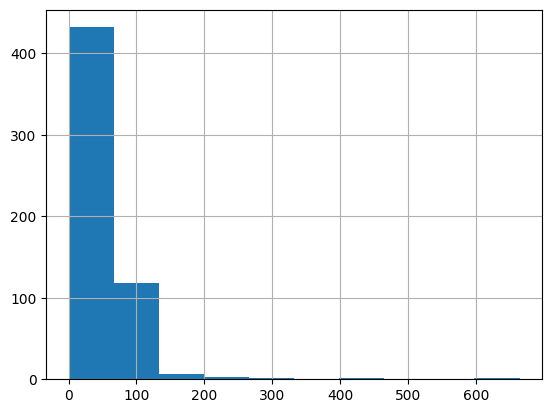

In [58]:
# посмотрим на распределение 
df_check_area.diff_percent.hist()

видим, что вопросы появляются для позиции с разницей более 120%

<AxesSubplot: >

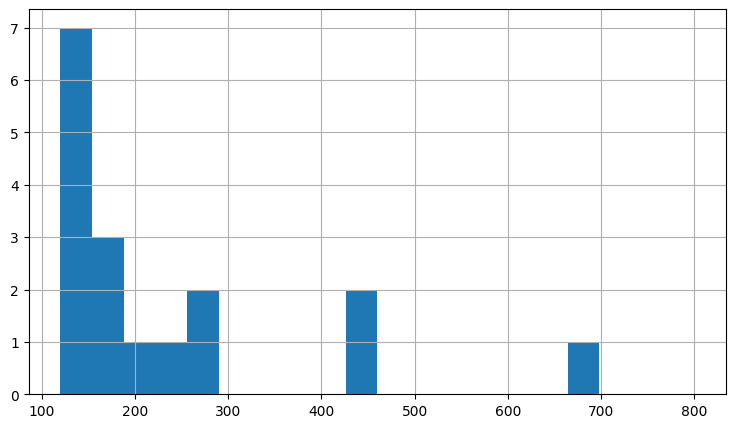

In [59]:
df_check_area.diff_percent.hist(bins=20, range=(120,800), figsize=(9,5))

ну то есть есть несколько значений разницы в процентах между стоимостью объекта и медианной стоимостью группы объектов в диапазоне от 120 до 700 процентов

это довольно много, посмотрим на эти объекты

In [60]:
df_check_area[df_check_area.diff_percent > 120]

,total_area,last_price,grouped_by_area,median_price,diff_percent
9,151.0,10350000.0,1,24466724.0,136.4
14,151.5,9300000.0,1,24466724.0,163.1
17,151.8,4390000.0,1,24466724.0,457.3
19,152.0,7500000.0,1,24466724.0,226.2
61,156.0,9700000.0,1,24466724.0,152.2
115,160.7,11067416.0,1,24466724.0,121.1
132,163.0,10800000.0,1,24466724.0,126.5
187,170.0,10335000.0,1,24466724.0,136.7
254,180.1,9600000.0,1,24466724.0,154.9
265,183.0,9900000.0,1,24466724.0,147.1


Пересечем их с основным датасетом, чтобы увидеть локации этих объектов, число комнат и расстояние до центра: скорее всего эти параметры сильно влияют на разницу в ценах между объектами

In [61]:
data.merge(df_check_area[df_check_area.diff_percent > 120],
           on=['total_area', 'last_price'],
           how='right')\
           [['total_area','rooms','price_per_sq_m', 'locality_name', 'cityCenters_nearest', 'diff_percent', 'last_price', 'median_price','grouped_by_area']]

,total_area,rooms,price_per_sq_m,locality_name,cityCenters_nearest,diff_percent,last_price,median_price,grouped_by_area
0,151.0,5,68543.05,Санкт-Петербург,6.0,136.4,10350000.0,24466724.0,1
1,151.5,4,61386.14,Павловск,32.0,163.1,9300000.0,24466724.0,1
2,151.8,6,28919.63,Санкт-Петербург,2.0,457.3,4390000.0,24466724.0,1
3,152.0,3,49342.11,Всеволожск,NaN,226.2,7500000.0,24466724.0,1
4,156.0,4,62179.49,Санкт-Петербург,3.0,152.2,9700000.0,24466724.0,1
5,160.7,2,68870.04,поселок Репино,43.0,121.1,11067416.0,24466724.0,1
6,163.0,4,66257.67,Санкт-Петербург,5.0,126.5,10800000.0,24466724.0,1
7,170.0,5,60794.12,Санкт-Петербург,15.0,136.7,10335000.0,24466724.0,1
8,180.1,4,53303.72,Зеленогорск,55.0,154.9,9600000.0,24466724.0,1
9,183.0,5,54098.36,Санкт-Петербург,11.0,147.1,9900000.0,24466724.0,1


Вопросы возникают к:
- квартира в Питере в 2 км от центра 151.8 квадратов за 4,4 млн - очень дешево, ошибка в цене - должно быть 44 млн (строка 2)

- квартира в Выборге 185 квадратов за 4,5 млн - тоже дешево даже для Выборга. Но в чем ошибка сходу неясно, явно не в ошибке с запятой в цене или площади - стоимость квадратного метра тоже не может быть 234 тыс руб вместо 23тыс (строка 10)

- квартира в Питере в 4 км от центра 190 квадратов за 3,2 млн - точно ошибка, речь идет об одной комнате 19м2 (строка 11)

- квартира к Красном Селе 320м2 за 14 млн - тоже сильно выбивается из общей картины по группе в целом и по Красному селу в частности (если фильтровать только по нему). Причина тоже непонятна. Возможно, состояние квартиры настолько плохое? (строка 15)

- квартира в Питере 460 квадратов за 20 млн в 15 км от центра - ошибка, должна быть цена в 200 млн (строка 16)

In [62]:
# здесь я проверяю как по отдельным насел пунктам распределяются абсолютные цены и цены за квадратный метр (для выводов выше)

data.query("locality_name =='Санкт-Петербург' & 400< total_area <600").sort_values('last_price')

# data.query("locality_name =='Выборг'").sort_values('last_price', ascending=False).head(20)

#data.query("locality_name =='Красное Село'").sort_values('last_price', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor
20273,12,20000000.0,460.80,2019-03-20,6,3.10,3.0,279.6,1,NaN,...,1.0,852.0,3.0,122.0,21,43402.78,2,3,2019,первый
22131,14,27000000.0,422.20,2018-10-18,5,2.70,13.0,NaN,11,NaN,...,0.0,0.0,0.0,0.0,0,63950.73,3,10,2018,другой
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6.0,NaN,6,NaN,...,0.0,0.0,0.0,0.0,0,65136.43,2,1,2019,последний
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3.0,248.7,3,NaN,...,1.0,852.0,3.0,122.0,179,72294.28,6,1,2018,последний
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12.0,NaN,3,NaN,...,1.0,592.0,0.0,0.0,5,87402.00,4,5,2017,другой
14991,19,45000000.0,413.50,2018-09-20,7,NaN,20.0,74.2,18,NaN,...,0.0,0.0,0.0,0.0,182,108827.09,3,9,2018,другой
660,3,49950000.0,483.90,2017-10-04,7,3.20,6.0,312.5,4,NaN,...,3.0,461.0,3.0,22.0,391,103223.81,2,10,2017,другой
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4.0,332.0,3,NaN,...,2.0,477.0,2.0,540.0,0,96711.80,5,10,2017,другой
14088,8,51000000.0,402.00,2017-02-07,6,3.15,8.0,300.0,6,NaN,...,1.0,253.0,0.0,0.0,32,126865.67,1,2,2017,другой
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,1.0,767.0,0.0,0.0,14,110169.49,3,2,2019,другой


Вероятно, разделить на группы дополнительно нужно было еще и по типу "Питер / область Питера", но в целом получилось более-менее наглядно.

поправим выявленные несоответствия

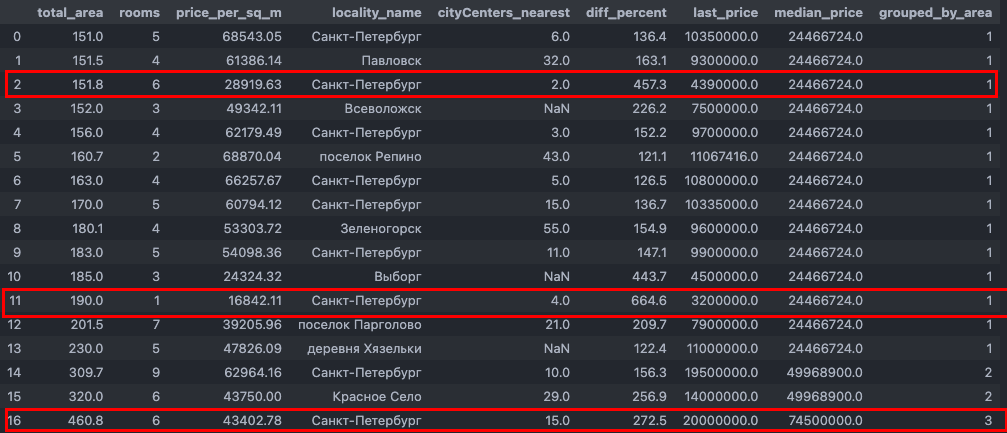

In [63]:
# правим строку 2 (добавляем нолик к цене)
data.loc[data.total_area== 151.8, 'last_price'] = 43_900_000

In [64]:
# правим строку 11 (переставляем запятую в площади)

data.loc[(data.total_area== 190) & (data.last_price == 3_200_000), 'total_area'] = 19


In [65]:
# правим строку 16 (добавляем нолик к цене)

data.loc[(data.total_area== 460.8), 'last_price'] = 20_000_000


    2. Поработаем со столбцом по жилой площади

<AxesSubplot: >

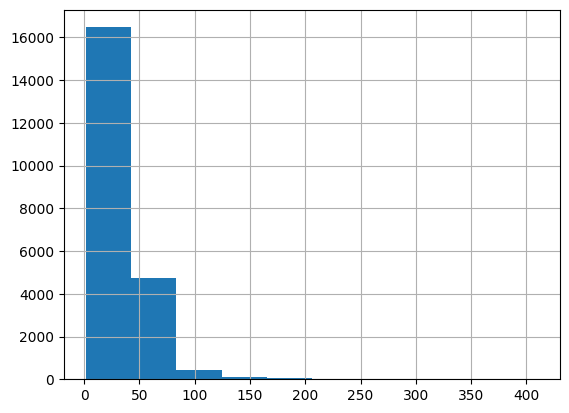

In [66]:
data.living_area.hist()

видим, что отчепенцы в диапазоне:
- менее 15 квадратов
-  от 120 квадратов и выше

<AxesSubplot: >

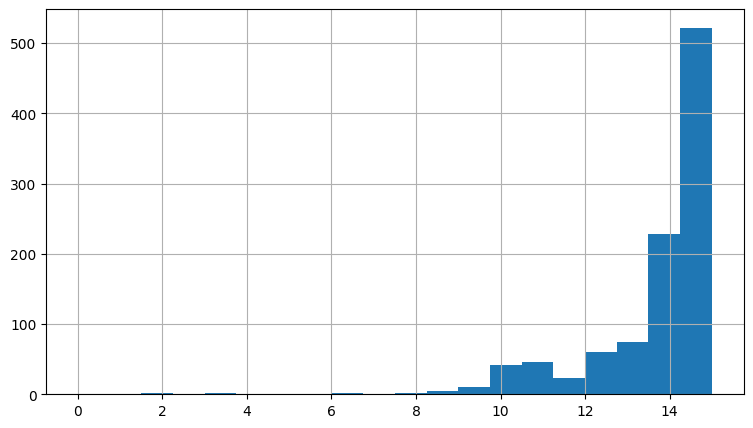

In [67]:
# посмотрим на них поближе

data.living_area.hist(bins=20, range=(0,15), figsize=(9,5))

<AxesSubplot: >

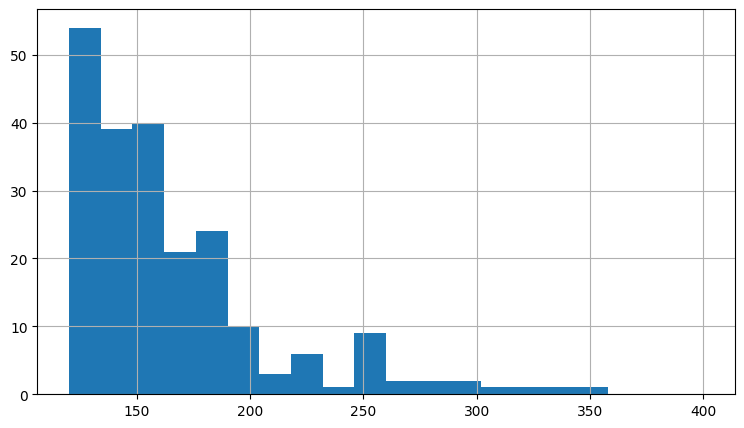

In [68]:
data.living_area.hist(bins=20, range=(120, 400), figsize=(9,5))

Уточним пороги "отчепенцев"

- менее 12 м2
- более 170 м2

In [69]:
data.query('living_area<=12 | living_area>=170')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,0.0,0.0,0.0,155,99195.71,3,11,2017,другой
101,4,3000000.0,37.00,2019-03-23,1,2.75,10.0,12.00,3,NaN,...,0.0,0.0,0.0,0.0,0,81081.08,5,3,2019,другой
114,5,4000000.0,21.40,2019-02-07,1,2.90,8.0,8.30,7,NaN,...,2.0,488.0,1.0,286.0,0,186915.89,3,2,2019,другой
155,8,96000000.0,317.00,2017-07-07,4,3.50,3.0,183.00,3,NaN,...,2.0,508.0,3.0,366.0,62,302839.12,4,7,2017,последний
248,7,4100000.0,31.00,2015-08-02,1,3.00,17.0,10.00,6,False,...,1.0,139.0,0.0,0.0,637,132258.06,6,8,2015,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23208,12,4800000.0,37.00,2016-02-24,1,NaN,14.0,8.00,11,NaN,...,2.0,358.0,1.0,950.0,139,129729.73,2,2,2016,другой
23359,10,3114406.0,36.13,2018-10-01,1,NaN,5.0,10.00,5,NaN,...,1.0,251.0,1.0,350.0,145,86200.00,0,10,2018,последний
23388,7,5400000.0,43.00,2017-04-24,1,NaN,18.0,12.00,8,NaN,...,0.0,0.0,0.0,0.0,124,125581.40,0,4,2017,другой
23481,1,3000000.0,37.29,2019-04-15,1,NaN,19.0,10.08,10,NaN,...,0.0,0.0,0.0,0.0,7,80450.52,0,4,2019,другой


общее число объектов под подозрением - 238 шт

посмтрим на них с позиции "сколько комнат" и "общая площадь"

In [70]:
data.query('living_area<=12 | living_area>=170')\
    [['living_area', 'rooms', 'total_area']]

,living_area,rooms,total_area
6,10.60,1,37.30
101,12.00,1,37.00
114,8.30,1,21.40
155,183.00,4,317.00
248,10.00,1,31.00
...,...,...,...
23208,8.00,1,37.00
23359,10.00,1,36.13
23388,12.00,1,43.00
23481,10.08,1,37.29


Смотреть не очень удобно, посмотри как лучше разбить на подгруппы 

оценим сколько всего уникальных значений комнат

In [71]:
sorted(data.query('living_area<=12 | living_area>=170')\
    [['living_area', 'rooms', 'total_area']].rooms.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 19]

довольно много разных значений. удивляет позиция с нулем комнат) очень странно

А если взять отношение жилой площади к общей и посмотреть как распределяются значения этих отношений?

In [72]:
# сначала посмотрим что это за объекты с нулем комнат
data.query('(living_area<=12 | living_area>=170) & rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor
716,5,1500000.0,17.00,2017-06-07,0,2.7,9.0,12.0,1,NaN,...,0.0,0.0,0.0,0.0,40,88235.29,2,6,2017,первый
1625,7,1980000.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,NaN,...,0.0,0.0,0.0,0.0,120,82568.81,3,2,2018,другой
8886,10,2450000.0,15.50,2018-08-22,0,NaN,5.0,10.0,2,NaN,...,0.0,0.0,1.0,446.0,27,158064.52,2,8,2018,другой
11051,2,2200000.0,26.00,2017-10-24,0,NaN,21.0,12.0,21,NaN,...,0.0,0.0,0.0,0.0,35,84615.38,1,10,2017,последний
17582,11,2680000.0,22.00,2018-08-11,0,NaN,25.0,5.0,8,NaN,...,1.0,835.0,1.0,652.0,70,121818.18,5,8,2018,другой
21758,0,2330000.0,23.00,2018-01-01,0,NaN,24.0,2.0,22,NaN,...,0.0,0.0,0.0,0.0,66,101304.35,0,1,2018,другой


На старте анализа помним, что данные по столбцу комнат были без пустых значений, значит значение 0 - результат не моих действий.

Откуда же он взялся?

таких объекто 6

In [73]:
data.query('(living_area<=12 | living_area>=170) & rooms==0')\
    [['rooms','total_area', 'living_area', 'floor', 'is_apartment','studio', 'open_plan']]

,rooms,total_area,living_area,floor,is_apartment,studio,open_plan
716,0,17.00,12.0,1,NaN,True,False
1625,0,23.98,10.5,3,NaN,False,True
8886,0,15.50,10.0,2,NaN,True,False
11051,0,26.00,12.0,21,NaN,False,True
17582,0,22.00,5.0,8,NaN,True,False
21758,0,23.00,2.0,22,NaN,True,False


Думаю, дело в том, что эти объекты - или студии, или открытые планировки

In [74]:
# смотрим саначала на весь набор с нулем комнат - там есть пустые значения и что-то еще

data.query('rooms==0')\
    [['rooms','total_area', 'living_area', 'floor', 'is_apartment','studio', 'open_plan']]\
    

,rooms,total_area,living_area,floor,is_apartment,studio,open_plan
144,0,27.00,15.50,2,NaN,True,False
349,0,25.00,17.00,1,NaN,False,True
440,0,27.11,24.75,4,NaN,True,False
508,0,34.40,24.30,19,NaN,False,True
608,0,25.00,NaN,7,NaN,True,False
...,...,...,...,...,...,...,...
23210,0,26.00,18.00,16,NaN,True,False
23442,0,27.70,18.00,4,NaN,False,True
23554,0,26.00,NaN,8,NaN,True,False
23592,0,29.00,18.00,8,NaN,False,True


ага, куча пустых значений в столбце is_apartment, зато в столбцах студия и открытая планировка True и False чередуются

на всякий случай посмотрим что за непустые значения в столбце is_apartment

In [75]:
# теперь смотрим на непустые значения
data.query('rooms==0 & ~is_apartment.isna()')\
    [['rooms','total_area', 'living_area', 'floor', 'is_apartment','studio', 'open_plan']]\
    

,rooms,total_area,living_area,floor,is_apartment,studio,open_plan
839,0,35.0,15.0,3,False,False,True
4930,0,23.0,19.0,1,False,True,False
5855,0,19.5,12.7,2,False,True,False
7256,0,29.2,16.7,3,False,True,False
10534,0,26.7,14.2,7,False,True,False
20584,0,22.2,16.6,7,False,True,False


Ну точно. 

 <font color='red'>0 комнат - это либо студия, либо открытая планировка</font>

Продолжаем выяснять адекватны ли данные в столбце Жилая площадь.

Возьмем отношение жилой площади к общей площади и построим гистограмму этих значений - ТОЛЬКО для тех позиций, которые вызвали сомнения (меньше 12м2 и больше 170м2)

In [76]:
# выводим отношение жилой к общей, строим гистограмму

df_check_liv_area= data.query('(living_area<=12 | living_area>=170)')\
    [['rooms','total_area', 'living_area']]

df_check_liv_area['planning_factor']= round(df_check_liv_area.living_area / df_check_liv_area.total_area, 2)

df_check_liv_area

,rooms,total_area,living_area,planning_factor
6,1,37.30,10.60,0.28
101,1,37.00,12.00,0.32
114,1,21.40,8.30,0.39
155,4,317.00,183.00,0.58
248,1,31.00,10.00,0.32
...,...,...,...,...
23208,1,37.00,8.00,0.22
23359,1,36.13,10.00,0.28
23388,1,43.00,12.00,0.28
23481,1,37.29,10.08,0.27


<AxesSubplot: >

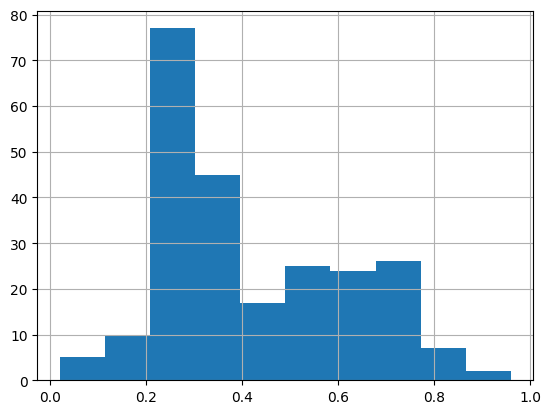

In [77]:
df_check_liv_area.planning_factor.hist()

Интересно, а как будет выглядеть распределение планировочного коэффициента для ВСЕХ данных? (гистограмма выше только для подозрительных данных)

<AxesSubplot: >

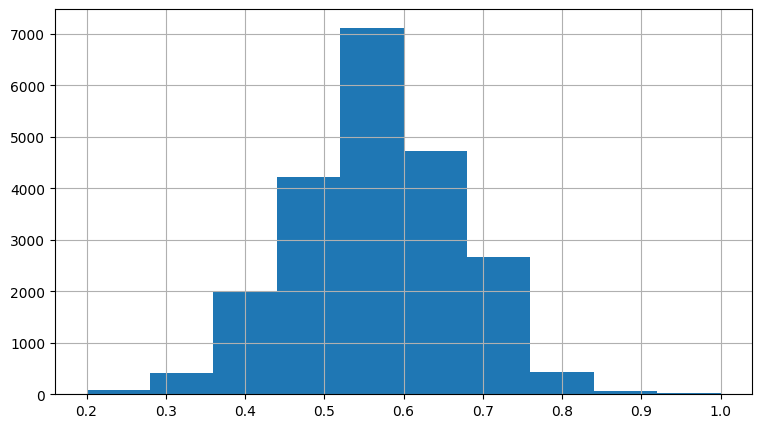

In [78]:
data['planning_factor']= round(data.living_area / data.total_area, 2)
data.planning_factor.hist(bins=10, range=(0.2,1), figsize=(9,5))

В общем-то, ничего необычного: подозрительными объектами являются те объекты, у которых очень мало жилой площади, или те, у которых ее слишком много

In [79]:
# посмотрим на объекты, у которых планировочный коэф меньше 0.2 и больше 0.7

df_check_liv_area.query('planning_factor<0.2 | planning_factor>0.7').sort_values('planning_factor')

,rooms,total_area,living_area,planning_factor
23574,3,139.0,3.0,0.02
13915,2,52.0,2.0,0.04
21943,4,77.6,5.4,0.07
3242,1,41.0,3.0,0.07
21758,0,23.0,2.0,0.09
2309,2,62.4,8.4,0.13
20994,2,50.6,8.0,0.16
1326,2,52.0,9.0,0.17
16034,2,60.2,10.5,0.17
8325,2,52.0,9.0,0.17


        Поиск в интернете говорит, что планировочный коэффициент обычно находится в рекомендованном промежутке от 0,5 до 0,7. В комфортабельных квартирах он ближе к нижней границе, в более экономичных – к верхней

Ну что ж, учитывая информацию выше, а также срез данных, укажем явные проблемные позиции:

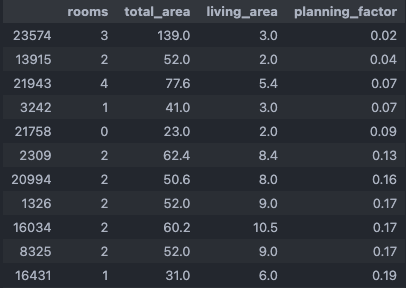

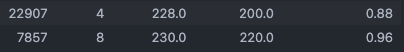

In [80]:
# поправим те, что кажутся ошибочными, остальные дропнем без сожаления

# соберем все индексы из основного датасета, где встречаются косячные данные по площадям
data.loc[(data.total_area.isin([139,52,77.6,23,62.4,50.6, 52,60.2, 31, 228, 230])) & 
         (data.living_area.isin([3,2,5.4,2,8.4,8,9,10.5,9,6,200,220]))]\
         .index

Int64Index([1326, 2309, 7857, 8325, 13915, 16034, 16431, 20994, 21758, 21943,
            22907, 23574],
           dtype='int64')

In [81]:
# выкинем их из датасета

data.drop([1326, 2309, 7857, 8325, 13915, 16034, 16431, 20994, 21758, 21943,
            22907, 23574], inplace=True)

In [82]:
# проверим, что выкинули 12 строк (спойлер: все верно, было 23699 строк)
data.shape

(23687, 28)

In [83]:
# изменим строку, у которой 41м2 общей площади и 3м2 жилой (изменим на 30м2)

data.loc[(data.total_area==41)& (data.living_area==3), 'living_area'] = 30

In [84]:
data.loc[(data.total_area==41)& (data.living_area==30)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,30.0,17,NaN,...,0.0,0.0,0.0,216,108292.68,6,7,2017,последний,0.07
4399,8,2500000.0,41.0,2017-04-30,2,2.55,3.0,30.0,1,False,...,0.0,1.0,814.0,310,60975.61,6,4,2017,первый,0.73
8998,5,1360000.0,41.0,2017-02-21,2,NaN,5.0,30.0,5,NaN,...,0.0,0.0,0.0,45,33170.73,1,2,2017,последний,0.73
17267,8,2799000.0,41.0,2017-07-06,3,2.50,5.0,30.0,5,NaN,...,630.0,1.0,230.0,11,68268.29,3,7,2017,последний,0.73


что ж, это как раз подтверждает, что не зря откорректировали площадь, а не удалили строку целиком - есть аналогичные объекты

        3. Работаем дальше - столбец площадь кухни

<AxesSubplot: >

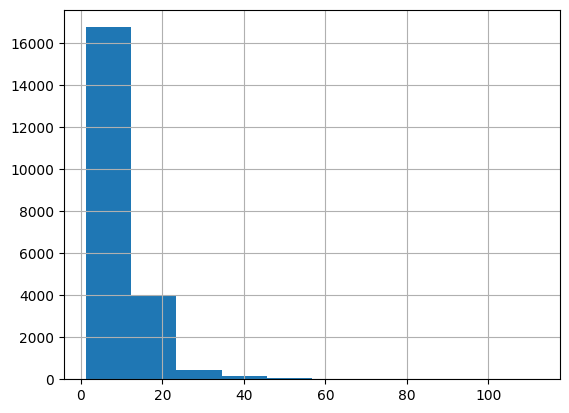

In [85]:
data.kitchen_area.hist()

<AxesSubplot: >

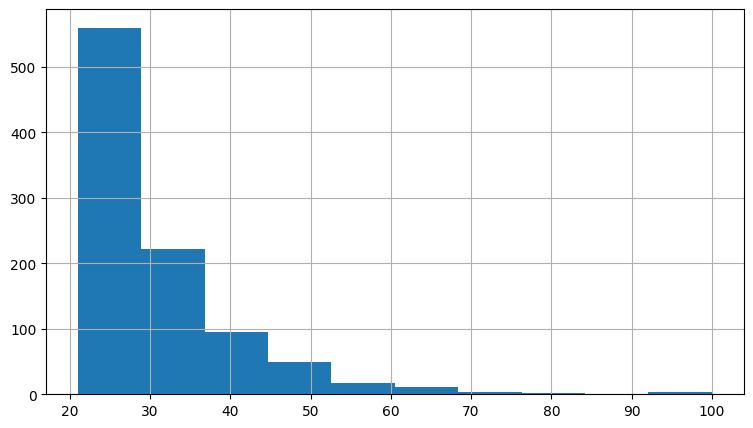

In [86]:
data.kitchen_area.hist(bins=10, range=(21,100), figsize=(9,5))

<AxesSubplot: >

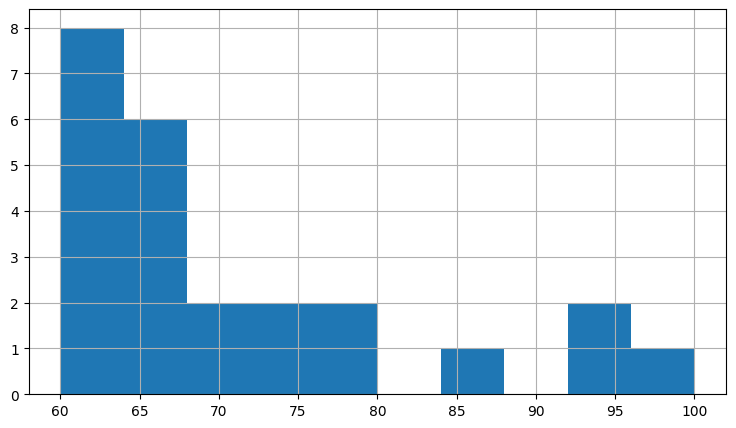

In [87]:
data.kitchen_area.hist(bins=10, range=(60,100), figsize=(9,5))

<AxesSubplot: >

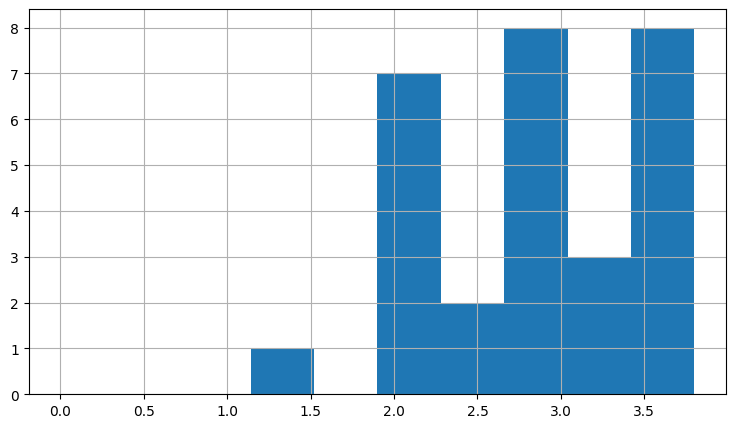

In [88]:
data.kitchen_area.hist(bins=10, range=(0,3.8), figsize=(9,5))

In [89]:
# посмотрим на все эти объекты, похоже их немного

data.query('kitchen_area>=60 | kitchen_area<3.8' )\
    [['kitchen_area','living_area','total_area', 'rooms', 'planning_factor', 'locality_name','price_per_sq_m']]

,kitchen_area,living_area,total_area,rooms,planning_factor,locality_name,price_per_sq_m
492,77.00,86.0,216.00,4,0.40,Санкт-Петербург,439814.81
906,2.00,18.0,27.00,1,0.67,Санкт-Петербург,96296.30
1026,63.00,190.0,310.00,5,0.61,Санкт-Петербург,500000.00
1085,66.00,255.7,323.00,5,0.79,Санкт-Петербург,232198.14
2165,3.00,17.0,25.00,1,0.68,Мурино,127200.00
2489,100.70,153.9,255.00,3,0.60,Санкт-Петербург,49019.61
3078,3.20,29.3,43.00,2,0.68,Санкт-Петербург,139534.88
3117,60.00,NaN,631.00,7,NaN,Санкт-Петербург,221870.05
3561,60.00,45.0,115.00,3,0.39,Санкт-Петербург,106956.52
4394,77.00,95.0,174.00,3,0.55,Санкт-Петербург,327586.21


Ничего удивительного, большие кухни в больших квартирах, причем в основном в Питере

Опять же, В соответствии с нормами, общая площадь кухни должна быть не менее 7% от общей жилой площади дома или квартиры.

Посчитаем этот коэффициент и посмотрим на наши данные под таким углом

In [90]:
df_check_kitchen_area = data.query('kitchen_area>=60 | kitchen_area<3.8')\
    [['kitchen_area','living_area','total_area', 'rooms', 'planning_factor', 'locality_name','price_per_sq_m', 'days_exposition']]

df_check_kitchen_area['kitch_pl_factor'] = round(df_check_kitchen_area.kitchen_area / df_check_kitchen_area.living_area *100 , 1)

df_check_kitchen_area

,kitchen_area,living_area,total_area,rooms,planning_factor,locality_name,price_per_sq_m,days_exposition,kitch_pl_factor
492,77.00,86.0,216.00,4,0.40,Санкт-Петербург,439814.81,14,89.5
906,2.00,18.0,27.00,1,0.67,Санкт-Петербург,96296.30,10,11.1
1026,63.00,190.0,310.00,5,0.61,Санкт-Петербург,500000.00,0,33.2
1085,66.00,255.7,323.00,5,0.79,Санкт-Петербург,232198.14,259,25.8
2165,3.00,17.0,25.00,1,0.68,Мурино,127200.00,19,17.6
2489,100.70,153.9,255.00,3,0.60,Санкт-Петербург,49019.61,102,65.4
3078,3.20,29.3,43.00,2,0.68,Санкт-Петербург,139534.88,37,10.9
3117,60.00,NaN,631.00,7,NaN,Санкт-Петербург,221870.05,0,NaN
3561,60.00,45.0,115.00,3,0.39,Санкт-Петербург,106956.52,63,133.3
4394,77.00,95.0,174.00,3,0.55,Санкт-Петербург,327586.21,1039,81.1


Ну, теперь критерии зачистки/ корректировки: 
- меньше 7%
- около или больше 50% жилой площади

In [91]:
df_check_kitchen_area.query('kitch_pl_factor <7 | kitch_pl_factor>50')

,kitchen_area,living_area,total_area,rooms,planning_factor,locality_name,price_per_sq_m,days_exposition,kitch_pl_factor
492,77.00,86.0,216.0,4,0.40,Санкт-Петербург,439814.81,14,89.5
2489,100.70,153.9,255.0,3,0.60,Санкт-Петербург,49019.61,102,65.4
3561,60.00,45.0,115.0,3,0.39,Санкт-Петербург,106956.52,63,133.3
4394,77.00,95.0,174.0,3,0.55,Санкт-Петербург,327586.21,1039,81.1
6193,70.00,90.0,230.0,4,0.39,Санкт-Петербург,105652.17,397,77.8
7950,2.89,44.4,66.4,2,0.67,Санкт-Петербург,89875.51,335,6.5
10867,87.20,87.2,177.9,3,0.49,Санкт-Петербург,319530.64,0,100.0
13139,62.00,100.7,288.0,5,0.35,Санкт-Петербург,190972.22,338,61.6
14644,75.00,58.0,150.0,4,0.39,Санкт-Петербург,313333.33,507,129.3
14900,62.50,42.7,125.6,2,0.34,Пушкин,206210.19,194,146.4


In [92]:
# заберем индексы и вычистим из осноного датасета эти строки

df_check_kitchen_area.query('kitch_pl_factor <7 | kitch_pl_factor>50').index

Int64Index([  492,  2489,  3561,  4394,  6193,  7950, 10867, 13139, 14644,
            14900, 15780, 16239, 16647, 16797, 17912, 18447, 19130, 19499,
            20215, 20217, 22980],
           dtype='int64')

In [93]:
# вычищаем 
data.drop([  492,  2489,  3561,  4394,  6193,  7950, 10867, 13139, 14644,
            14900, 15780, 16239, 16647, 16797, 17912, 18447, 19130, 19499,
            20215, 20217, 22980], inplace=True)

In [94]:
data.shape

(23666, 28)

все верно, удалили 21 строчку

        4. Работаем по столбцу цена объекта

In [95]:
data.last_price.max()

763000000.0

In [96]:
data.last_price.min()

12190.0

<AxesSubplot: >

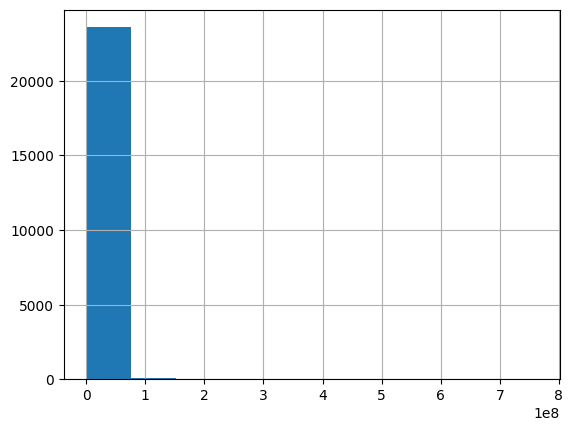

In [97]:
data.last_price.hist()

Путем подбора границ видим, что самые нелепые объекты лежат в границах от 12тр до 1.2 млн

<AxesSubplot: >

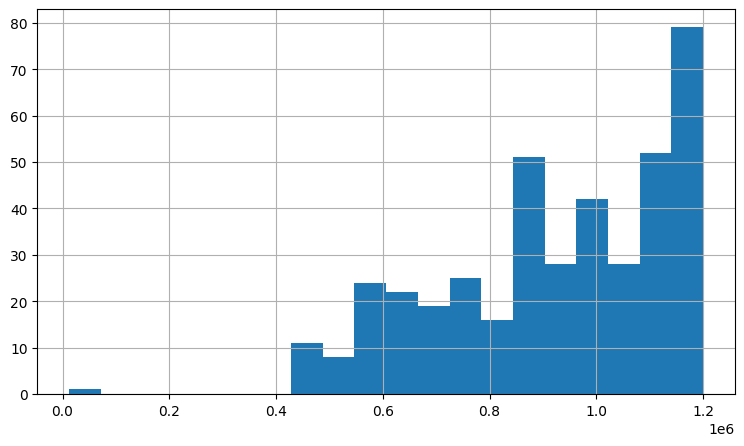

In [98]:
data.last_price.hist(bins=20, range=(12190.0,1_200_000), figsize=(9,5))

Аналогично для верхней границы - подозрительные цифры начинаются от 150 млн

<AxesSubplot: >

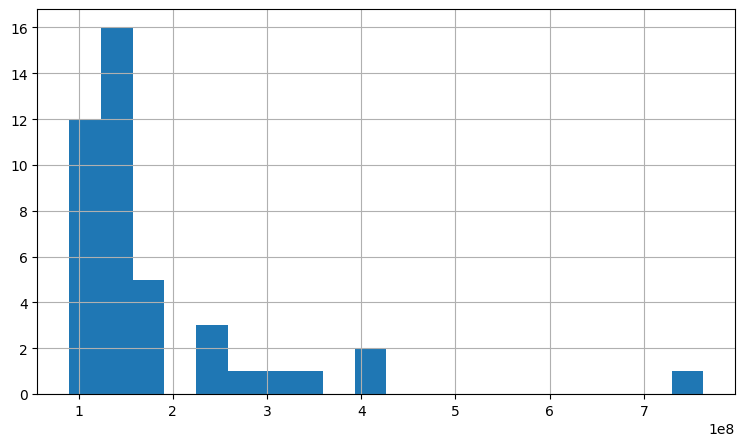

In [99]:
data.last_price.hist(bins=20, range=(90_000_000,763000000), figsize=(9,5))

In [100]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_m', 'weekday_fd_exp',
       'month_fd_exp', 'year_fd_exp', 'grouped_by_floor', 'planning_factor'],
      dtype='object')

In [101]:
# соберем их вместе, посмотрим на эти объекты

data.query('last_price< 1_200_000 | last_price> 150_000_000')\
    [['last_price', 'total_area', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values('last_price', ascending=False)

,last_price,total_area,locality_name,cityCenters_nearest,price_per_sq_m
12971,763000000.0,400.0,Санкт-Петербург,4.0,1907500.00
19540,420000000.0,900.0,Санкт-Петербург,8.0,466666.67
14706,401300000.0,401.0,Санкт-Петербург,2.0,1000748.13
1436,330000000.0,190.0,Санкт-Петербург,1.0,1736842.11
15651,300000000.0,618.0,Санкт-Петербург,5.0,485436.89
...,...,...,...,...,...
9581,450000.0,43.4,деревня Старополье,NaN,10368.66
16274,440000.0,40.0,деревня Старополье,NaN,11000.00
17456,430000.0,30.4,Сланцы,NaN,14144.74
14911,430000.0,54.0,поселок станции Свирь,NaN,7962.96


ясности не дало, посмотрим по отдельности: по нижней и по верхней границе

In [102]:
data.query('last_price> 150_000_000')\
    [['last_price', 'total_area', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values('last_price', ascending=False)

,last_price,total_area,locality_name,cityCenters_nearest,price_per_sq_m
12971,763000000.0,400.0,Санкт-Петербург,4.0,1907500.00
19540,420000000.0,900.0,Санкт-Петербург,8.0,466666.67
14706,401300000.0,401.0,Санкт-Петербург,2.0,1000748.13
1436,330000000.0,190.0,Санкт-Петербург,1.0,1736842.11
15651,300000000.0,618.0,Санкт-Петербург,5.0,485436.89
22831,289238400.0,187.5,Санкт-Петербург,1.0,1542604.80
16461,245000000.0,285.7,Санкт-Петербург,6.0,857542.88
13749,240000000.0,410.0,Санкт-Петербург,5.0,585365.85
5893,230000000.0,500.0,Санкт-Петербург,5.0,460000.00
8900,190870000.0,268.0,Санкт-Петербург,5.0,712201.49


как это ни грустно, но похоже, что цены за большие квартиры в самом центре Питера - правдивы))

трогать их не будем

А что с нижней границей?

In [103]:
data.query('last_price< 1_200_000')\
    [['last_price', 'total_area', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values('last_price', ascending=False)

,last_price,total_area,locality_name,cityCenters_nearest,price_per_sq_m
11411,1199000.0,41.0,деревня Белогорка,NaN,29243.90
1721,1190000.0,32.5,поселок Елизаветино,NaN,36615.38
20946,1190000.0,60.0,поселок городского типа Лесогорский,NaN,19833.33
19642,1190000.0,14.0,Санкт-Петербург,11.0,85000.00
7862,1180000.0,33.0,Кириши,NaN,35757.58
...,...,...,...,...,...
16219,450000.0,38.5,деревня Вахнова Кара,NaN,11688.31
16274,440000.0,40.0,деревня Старополье,NaN,11000.00
17456,430000.0,30.4,Сланцы,NaN,14144.74
14911,430000.0,54.0,поселок станции Свирь,NaN,7962.96


In [104]:
# слишком много объектов, разделим их на две части - в Питере/ в области

data.query('last_price< 1_200_000 & locality_name == "Санкт-Петербург"')\
    [['last_price', 'total_area', 'rooms', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values('last_price', ascending=False)

,last_price,total_area,rooms,locality_name,cityCenters_nearest,price_per_sq_m
19642,1190000.0,14.0,1,Санкт-Петербург,11.0,85000.00
8793,12190.0,109.0,2,Санкт-Петербург,9.0,111.83


с первым объектом все хорошо (хоть и грустно жить в 14 м2)

а второй явно аномалия/ошибка. поправим значение - на 12,19 млн руб за квартиру недалеко от центра

In [105]:
data.loc[8793, 'last_price'] = 12_190_000

Так, теперь смотрим что там в области

In [106]:
data.query('last_price< 1_200_000 & locality_name != "Санкт-Петербург"')\
    [['last_price', 'total_area', 'rooms', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values(['price_per_sq_m','last_price'], ascending=True)

,last_price,total_area,rooms,locality_name,cityCenters_nearest,price_per_sq_m
14911,430000.0,54.0,2,поселок станции Свирь,NaN,7962.96
4405,500000.0,52.0,2,Сланцы,NaN,9615.38
11351,550000.0,54.0,2,Сланцы,NaN,10185.19
9581,450000.0,43.4,2,деревня Старополье,NaN,10368.66
23484,470000.0,44.5,2,Сланцы,NaN,10561.80
...,...,...,...,...,...,...
5221,1050000.0,25.0,1,Выборг,NaN,42000.00
6084,770000.0,18.0,1,Тихвин,NaN,42777.78
18098,965780.0,22.5,1,Всеволожск,NaN,42923.56
5855,945750.0,19.5,0,поселок городского типа Дубровка,NaN,48500.00


In [107]:
data.query('last_price< 1_200_000 & locality_name != "Санкт-Петербург"')\
    [['last_price', 'total_area', 'rooms', 'locality_name', 'cityCenters_nearest', 'price_per_sq_m']]\
    .sort_values(['price_per_sq_m','last_price'], ascending=True).head(20)

,last_price,total_area,rooms,locality_name,cityCenters_nearest,price_per_sq_m
14911,430000.0,54.0,2,поселок станции Свирь,NaN,7962.96
4405,500000.0,52.0,2,Сланцы,NaN,9615.38
11351,550000.0,54.0,2,Сланцы,NaN,10185.19
9581,450000.0,43.4,2,деревня Старополье,NaN,10368.66
23484,470000.0,44.5,2,Сланцы,NaN,10561.80
5698,450000.0,42.0,2,городской поселок Будогощь,NaN,10714.29
19460,560000.0,52.0,2,Сланцы,NaN,10769.23
9471,850000.0,78.0,3,Гатчина,NaN,10897.44
15969,590000.0,54.0,2,Сланцы,NaN,10925.93
16274,440000.0,40.0,1,деревня Старополье,NaN,11000.00


Что ж, как это ни печально (снова), но Яндекс.Недвижимость говорит, что такие цены на квартиры в Сланцах, Свирях, Старопольях - это суровая реальность.

Трогать их не будем тоже.

        5. C количеством комнат поработали выше, но для успокоения совести построим гистограмму

<AxesSubplot: >

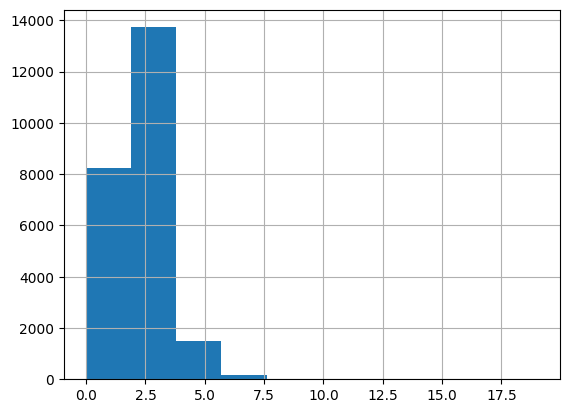

In [108]:
data.rooms.hist()

ну как бы очевидно, что больше 7 комнат - это очень большая редкость.

и это напрямую связано с общей площадью и итоговой стоимостью квартиры (конечно с оговоркой, где находится эта квартира - в Питере или в области)

<AxesSubplot: >

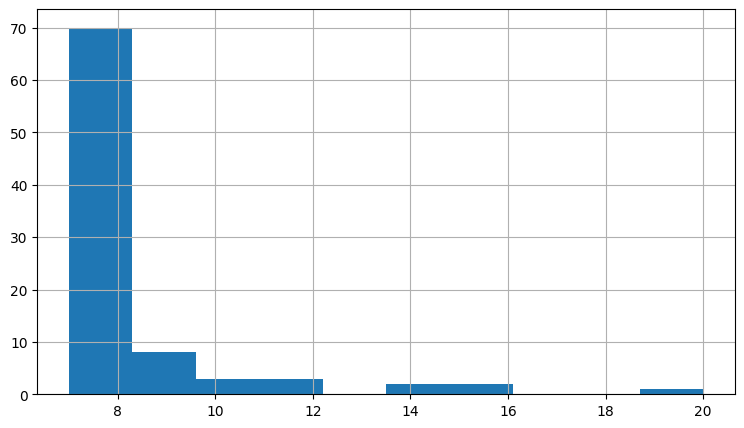

In [109]:
data.rooms.hist(range= (7,20), figsize=(9,5))

In [110]:
data.query('rooms>8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,...,0.0,0.0,0.0,0,95264.02,6,7,2018,последний,0.76
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,...,0.0,2.0,435.0,418,68870.52,5,12,2017,другой,0.61
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,NaN,...,191.0,1.0,531.0,0,84372.71,3,1,2018,последний,0.54
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,767.0,0.0,0.0,14,110169.49,3,2,2019,другой,0.69
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.1,1,False,...,471.0,2.0,440.0,471,125550.00,2,7,2017,первый,0.40
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6.0,NaN,3,NaN,...,346.0,0.0,0.0,90,72340.43,5,7,2018,другой,NaN
9550,10,23500000.0,313.0,2017-02-13,9,3.20,6.0,179.2,5,NaN,...,146.0,0.0,0.0,0,75079.87,0,2,2017,другой,0.57
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,...,686.0,2.0,66.0,813,170015.46,1,2,2017,другой,0.66
13019,0,22250000.0,249.9,2019-04-23,9,3.20,5.0,157.0,5,NaN,...,352.0,0.0,0.0,0,89035.61,1,4,2019,последний,0.63
13397,14,19500000.0,309.7,2016-02-03,9,NaN,5.0,199.0,5,NaN,...,352.0,0.0,0.0,468,62964.16,2,2,2016,последний,0.64


In [111]:
# для успокоения посмотрим сколько приходится жилой площади на каждую комнату

df_check_rooms = data.query('rooms>8')\
    [['living_area', 'rooms']]

df_check_rooms['area_per_room']= round(df_check_rooms.living_area/ df_check_rooms.rooms, 1)

df_check_rooms


,living_area,rooms,area_per_room
648,138.8,11,12.6
866,222.0,14,15.9
4149,145.9,10,14.6
5358,409.0,15,27.3
8822,160.1,9,17.8
8860,NaN,9,NaN
9550,179.2,9,19.9
9688,129.0,11,11.7
13019,157.0,9,17.4
13397,199.0,9,22.1


Цифры разумны, не будем их трогать

        6. высота потолков

Тут сходу можно сказать, что меньше 2 и больше 5 будут неадекватны. Убедимся

<AxesSubplot: >

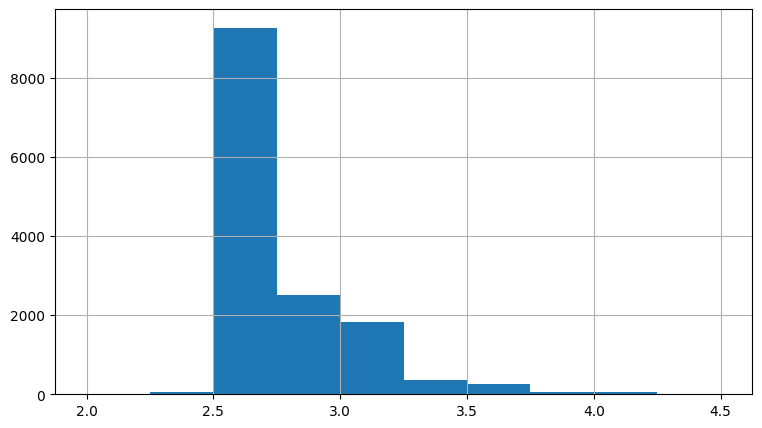

In [112]:
data.ceiling_height.hist(range=(2,4.5), figsize=(9,5))

In [113]:
# посмотрим на объекты с потолком ниже 2.5 м и выше 3.7

data.query('ceiling_height> 3.7 | ceiling_height<2.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,...,344.0,1.0,838.0,38,102500.00,1,11,2018,другой,0.55
179,5,14800000.0,108.7,2019-04-11,3,4.00,5.0,72.4,5,NaN,...,559.0,0.0,0.0,0,136154.55,3,4,2019,последний,0.67
193,6,7920000.0,83.8,2017-08-17,4,2.47,9.0,55.9,9,NaN,...,0.0,1.0,289.0,155,94510.74,3,8,2017,последний,0.67
227,13,2200000.0,47.0,2018-01-12,3,2.34,5.0,NaN,1,NaN,...,0.0,0.0,0.0,45,46808.51,4,1,2018,первый,NaN
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,0.0,0.0,0.0,259,65217.39,3,7,2018,другой,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22965,19,35000000.0,236.0,2019-03-26,6,4.00,5.0,164.3,2,NaN,...,243.0,1.0,827.0,18,148305.08,1,3,2019,другой,0.70
23121,20,4290000.0,35.2,2018-09-12,1,2.47,14.0,20.0,7,NaN,...,506.0,0.0,0.0,41,121875.00,2,9,2018,другой,0.57
23330,6,19900000.0,144.0,2017-01-09,3,3.80,5.0,79.5,3,NaN,...,521.0,0.0,0.0,0,138194.44,0,1,2017,другой,0.55
23496,7,3300000.0,55.3,2018-06-19,2,2.45,14.0,31.0,2,False,...,0.0,0.0,0.0,62,59674.50,1,6,2018,другой,0.56


снова разобьем их на две части

In [114]:
data.query(' ceiling_height<2.5').sort_values('ceiling_height').head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
22590,16,6000000.0,55.00,2018-10-31,2,1.00,12.0,32.400000,7,NaN,...,293.0,2.0,289.0,13,109090.91,2,10,2018,другой,0.59
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2.0,27.500000,1,NaN,...,0.0,0.0,0.0,248,35046.73,0,8,2017,первый,0.64
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37.0,17.400000,5,NaN,...,0.0,3.0,80.0,71,102500.00,1,10,2017,другой,0.43
22960,17,2300000.0,53.60,2018-10-18,2,2.00,2.0,19.000000,1,NaN,...,0.0,0.0,0.0,0,42910.45,3,10,2018,первый,0.35
552,11,2999000.0,33.50,2017-03-30,1,2.00,15.0,17.500000,6,NaN,...,520.0,1.0,949.0,270,89522.39,3,3,2017,другой,0.52
20520,9,3600000.0,38.00,2018-07-05,1,2.00,12.0,15.000000,9,NaN,...,0.0,0.0,0.0,62,94736.84,3,7,2018,другой,0.39
19329,5,1700000.0,40.00,2018-07-15,2,2.00,9.0,NaN,8,NaN,...,0.0,0.0,0.0,45,42500.00,6,7,2018,другой,NaN
19098,7,2700000.0,56.00,2018-02-04,3,2.00,5.0,46.000000,1,NaN,...,0.0,0.0,0.0,282,48214.29,6,2,2018,первый,0.82
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17.0,15.200000,12,NaN,...,0.0,0.0,0.0,53,91666.67,6,6,2017,другой,0.42
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5.0,NaN,5,NaN,...,0.0,0.0,0.0,100,46478.87,1,5,2018,последний,NaN


In [115]:
# выкину объекты с высотой потолка ниже 2м

data.drop([22590, 5712, 16934], inplace= True)

In [116]:
data.query('ceiling_height> 3.7 ').sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,223.0,3.0,30.0,19,600000.00,2,7,2018,последний,0.56
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,...,0.0,3.0,511.0,0,108214.29,4,4,2019,другой,0.60
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,...,0.0,0.0,0.0,0,38666.67,0,11,2018,другой,0.71
21377,19,4900000.0,42.0,2017-04-18,1,27.50,24.0,37.7,19,False,...,0.0,0.0,0.0,61,116666.67,1,4,2017,другой,0.90
5246,0,2500000.0,54.0,2017-10-13,2,27.00,5.0,30.0,3,NaN,...,0.0,0.0,0.0,540,46296.30,4,10,2017,другой,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15250,5,6900000.0,98.0,2016-03-18,4,3.75,4.0,70.0,3,NaN,...,203.0,0.0,0.0,395,70408.16,4,3,2016,другой,0.71
2939,7,6550000.0,64.3,2018-01-12,2,3.75,7.0,48.8,3,NaN,...,320.0,1.0,293.0,98,101866.25,4,1,2018,другой,0.76
2220,10,16800000.0,84.0,2019-04-17,3,3.75,4.0,58.0,2,NaN,...,474.0,1.0,689.0,0,200000.00,2,4,2019,другой,0.69
16724,4,32000000.0,235.0,2015-06-02,5,3.75,5.0,160.0,3,NaN,...,0.0,3.0,568.0,1275,136170.21,1,6,2015,другой,0.68


Тут логика другая:
1) 100 м - удалить, явно бред
2) найти нижнюю грань для нереально больших потолков (примерно от 25 метров) и поставить запятую

In [117]:
# удалим стометровый потолок

data.drop(22869, inplace= True)

<AxesSubplot: >

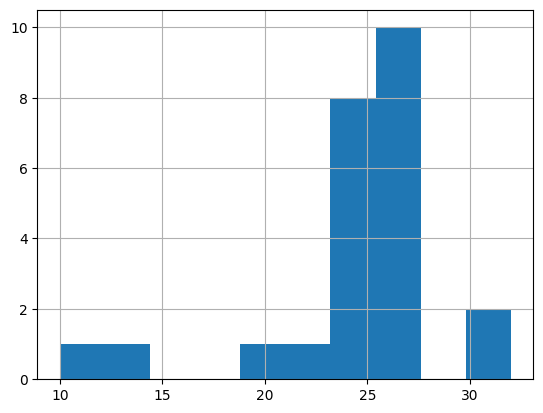

In [118]:
data.query('ceiling_height> 3.7 ').ceiling_height.hist(range=(10, 32))

In [119]:
data.query('10<ceiling_height< 24 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14.0,32.4,5,NaN,...,0.0,0.0,0.0,315,99290.78,4,5,2018,другой,0.57
17496,15,6700000.0,92.9,2019-02-19,3,20.0,17.0,53.2,14,NaN,...,967.0,0.0,0.0,0,72120.56,1,2,2019,другой,0.57
20507,12,5950000.0,60.0,2018-02-19,2,22.6,14.0,35.0,11,NaN,...,0.0,0.0,0.0,40,99166.67,0,2,2018,другой,0.58
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16.0,15.5,15,NaN,...,440.0,2.0,450.0,136,117777.78,5,9,2017,другой,0.34


In [120]:
# удалим квартиры с потолками от 10 до 24 м - какие-то аномальные данные)
data.drop([15061, 17496, 20507, 22309], inplace=True)

In [121]:
# а потолки от 25 м и выше заменим на значение, деленное на 10 (исправим ошибку)
data.query('10<ceiling_height >= 25 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,0.0,0.0,0.0,259,65217.39,3,7,2018,другой,0.58
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,0.0,0.0,0.0,0,38666.67,0,11,2018,другой,0.71
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,658.0,1.0,331.0,181,95555.56,3,2,2018,другой,0.67
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,0.0,0.0,0.0,28,120000.00,2,9,2017,другой,0.68
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,0.0,0.0,0.0,540,46296.30,4,10,2017,другой,0.56
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,305.0,0.0,0.0,267,88000.00,1,8,2017,другой,0.43
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,0.0,3.0,80.0,38,101875.00,2,1,2019,другой,0.51
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,417.0,2.0,73.0,0,74324.32,0,3,2019,последний,0.70
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,0.0,0.0,0.0,0,94047.62,6,3,2017,другой,0.71
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,0.0,0.0,0.0,71,65517.24,4,10,2017,другой,0.52


In [122]:
data.query('10<ceiling_height >= 25 ').index


Int64Index([  355,  3148,  4643,  4876,  5246,  5669,  5807,  6246,  9379,
            10773, 11285, 14382, 17857, 18545, 20478, 21377, 21824, 22336,
            22938],
           dtype='int64')

In [123]:
for ind in [  355,  3148,  4643,  4876,  5246,  5669,  5807,  6246,  9379,
            10773, 11285, 14382, 17857, 18545, 20478, 21377, 21824, 22336,
            22938]:
    
    data.loc[ind, 'ceiling_height'] /= 10

In [124]:
data.loc[[  355,  3148,  4643,  4876,  5246,  5669,  5807,  6246,  9379,
            10773, 11285, 14382, 17857, 18545, 20478, 21377, 21824, 22336,
            22938]]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
355,17,3600000.0,55.2,2018-07-12,2,2.50,5.0,32.0,2,False,...,0.0,0.0,0.0,259,65217.39,3,7,2018,другой,0.58
3148,14,2900000.0,75.0,2018-11-12,3,3.20,3.0,53.0,2,NaN,...,0.0,0.0,0.0,0,38666.67,0,11,2018,другой,0.71
4643,0,4300000.0,45.0,2018-02-01,2,2.50,9.0,30.0,2,NaN,...,658.0,1.0,331.0,181,95555.56,3,2,2018,другой,0.67
4876,7,3000000.0,25.0,2017-09-27,0,2.70,25.0,17.0,17,NaN,...,0.0,0.0,0.0,28,120000.00,2,9,2017,другой,0.68
5246,0,2500000.0,54.0,2017-10-13,2,2.70,5.0,30.0,3,NaN,...,0.0,0.0,0.0,540,46296.30,4,10,2017,другой,0.56
5669,4,4400000.0,50.0,2017-08-08,2,2.60,9.0,21.3,3,NaN,...,305.0,0.0,0.0,267,88000.00,1,8,2017,другой,0.43
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36.0,41.0,13,NaN,...,0.0,3.0,80.0,38,101875.00,2,1,2019,другой,0.51
6246,6,3300000.0,44.4,2019-03-25,2,2.50,5.0,31.3,5,NaN,...,417.0,2.0,73.0,0,74324.32,0,3,2019,последний,0.70
9379,5,3950000.0,42.0,2017-03-26,3,2.50,5.0,30.0,2,NaN,...,0.0,0.0,0.0,0,94047.62,6,3,2017,другой,0.71
10773,8,3800000.0,58.0,2017-10-13,2,2.70,10.0,30.1,3,False,...,0.0,0.0,0.0,71,65517.24,4,10,2017,другой,0.52


отлично, данные по высотам потолков поправили

        7. тип этажа квартиры

<AxesSubplot: >

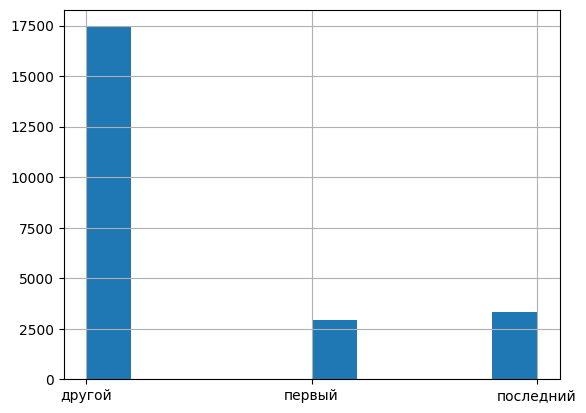

In [125]:
data.grouped_by_floor.hist()

ничего необычного. первых и последних этажей в общей массе примерно одинаково, а всех остальных- значительно больше

        8. общее количество этажей в доме

<AxesSubplot: >

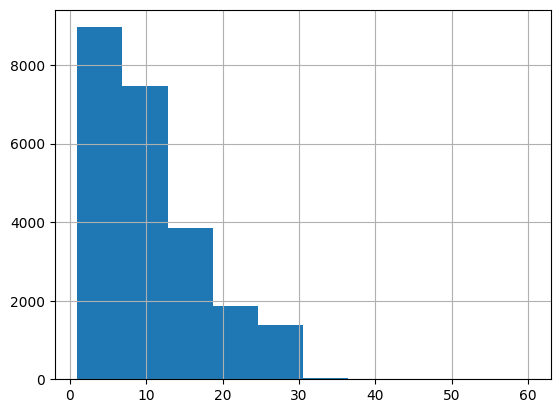

In [126]:
data.floors_total.hist()

<AxesSubplot: >

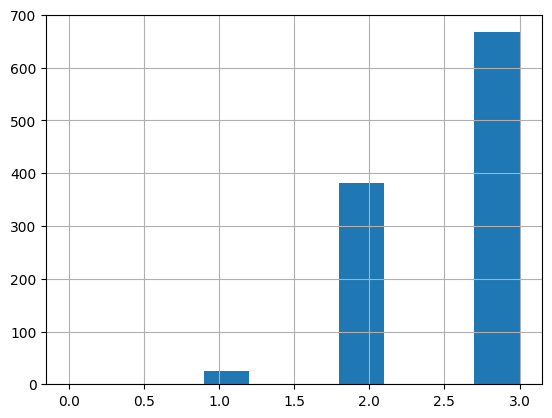

In [127]:
data.floors_total.hist(range=(0,3))

In [128]:
data.query('floors_total <2')\
    [['floors_total', 'locality_name', 'price_per_sq_m','rooms' ]]

,floors_total,locality_name,price_per_sq_m,rooms
3076,1.0,Волосово,25000.00,3
4379,1.0,городской поселок Рощино,90598.29,2
5300,1.0,поселок при железнодорожной станции Вещево,49833.33,3
5698,1.0,городской поселок Будогощь,10714.29,2
5787,1.0,Санкт-Петербург,102272.73,3
7962,1.0,Луга,11904.76,3
8335,1.0,Луга,33750.00,3
8388,1.0,Сестрорецк,73651.45,3
9517,1.0,поселок Гаврилово,30456.85,2
9752,1.0,деревня Сижно,13709.68,2


ну сложно сказать. не до конца ясно - квартиры это в многоквартирных домах или все-таки в одноэтажных домах (редко, но встречается). Я бы их не трогал - лушче запросить по ним информацию у тех, кто собирал данные

<AxesSubplot: >

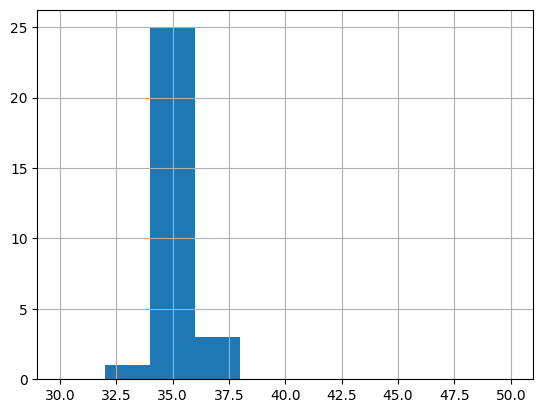

In [129]:
data.floors_total.hist(range=(30,50))

тут тоже ничего трогать не будем - ничего не обычного в современных многоэтажках нет

        9.расстояние до центра города в километрах

<AxesSubplot: >

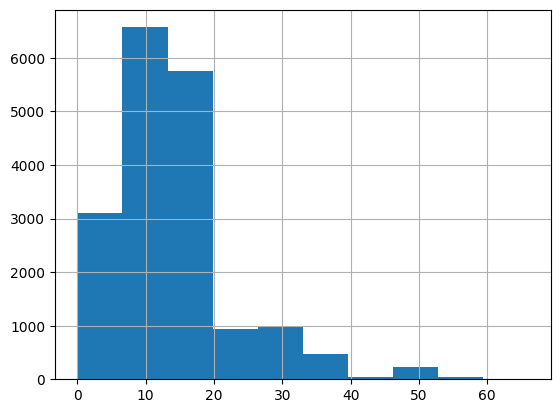

In [130]:
data.cityCenters_nearest.hist()

ну, слишком близко к центру даже смотреть не будем.

а вот что за мелкие значения между 39 и 46 км и больше 52 км?

<AxesSubplot: >

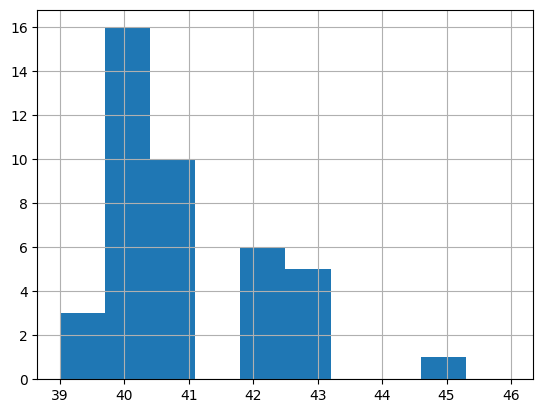

In [131]:
data.cityCenters_nearest.hist(range =(39,46))

<AxesSubplot: >

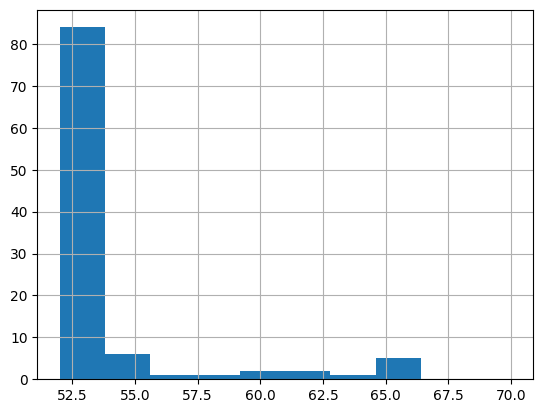

In [132]:
data.cityCenters_nearest.hist(range =(52,70))

Как странность можно отметить только то, что неожиданными являются значения 44 км (вообще нет объектов на таком удалении), и внезапно большое число объектов на удалении в 46-52 км (потом снова резко падает).

как будто в базу не попадает довольно большое число объектов в радиусе от 39 до 46 км

        10. расстояние до ближайшего парка

<AxesSubplot: >

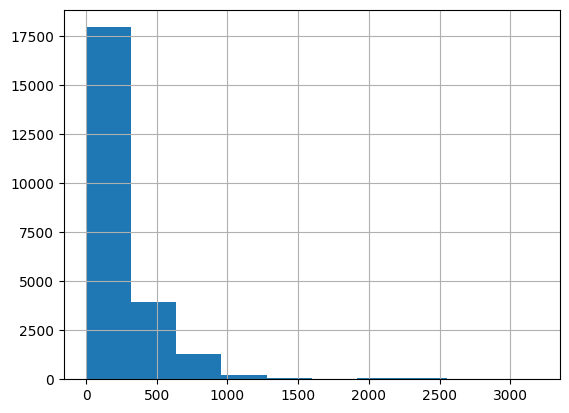

In [133]:
data.parks_nearest.hist()

<AxesSubplot: >

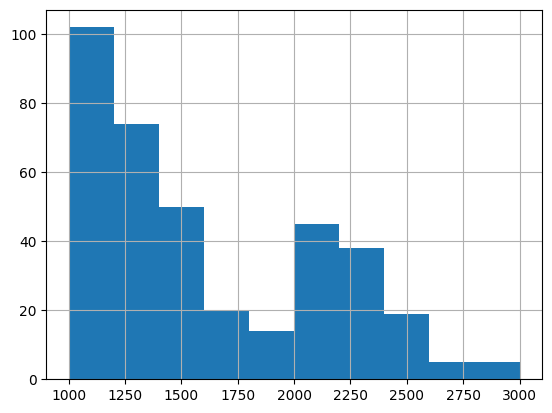

In [134]:
data.parks_nearest.hist(range=(1000, 3000))

Ну опять же, эта картина может дать информацию только в купе с оценкой числа парков в городах и возможно выявить прямую корреляцию с частотой их появления в отчете для хаотично выбранных объектов на карте

        12. Поработаем со столбцом days_exposition - оценим как быстро продавались квартиры

<AxesSubplot: >

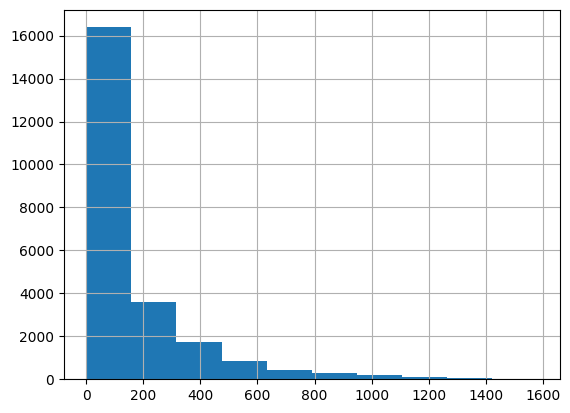

In [135]:
data.days_exposition.hist()

Самые быстрые продажи лежат в диапазоне от 0 до 200 дней

Самые долгие - свыше 800 дней.

Посмотрим на границы поближе

<AxesSubplot: >

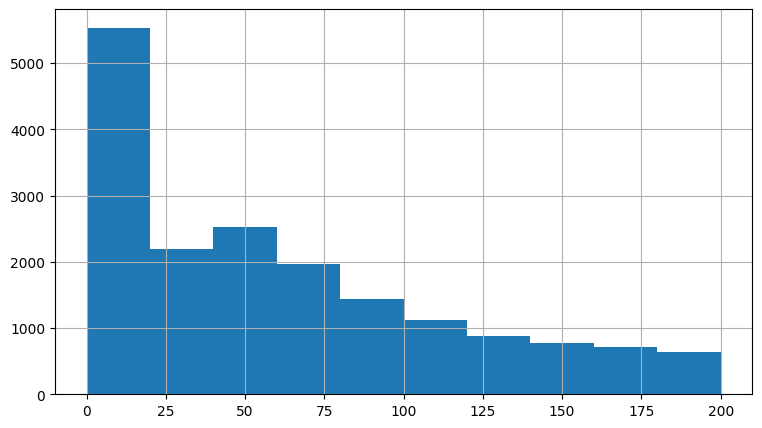

In [136]:
# сначала выясним границы самых быстрых продаж
data.days_exposition.hist(range=(0,200), figsize=(9,5))

<AxesSubplot: >

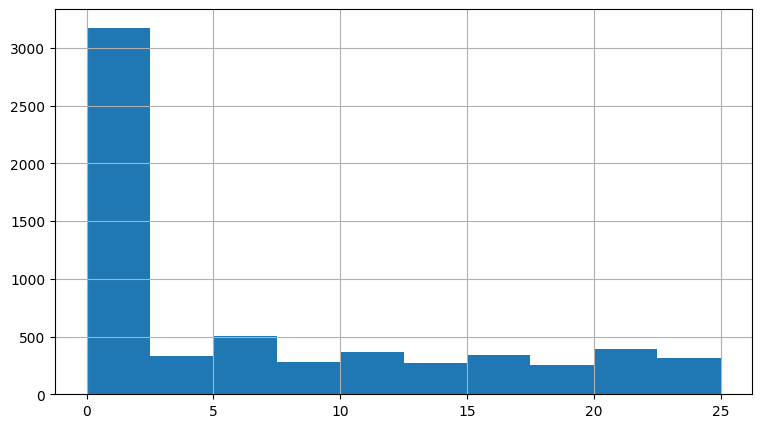

In [137]:
data.days_exposition.hist(range=(0,25), figsize=(9,5))

Очевидный вывод - сверхбыстрые продажи случились в течение 3 дней с момента публикации

<AxesSubplot: >

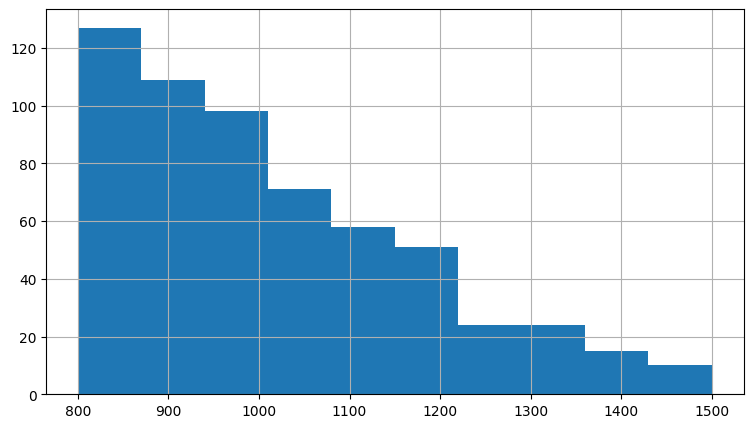

In [138]:
# теперь со сверхдолгими
data.days_exposition.hist(range=(800, 1500), figsize=(9,5))

По этой гистограмме мало, что понятно.  Посмотрим среднее и медианное число дней продажи

In [139]:
# среднее число 
data.days_exposition.mean()

156.56636232986727

In [140]:
# медианное значение
data.days_exposition.median()

74.0

Значения среднего и медианного сильно разнятся.

Половина квартир продается быстрее, чем за 74 дня, и половина — медленнее. Среднее значение (157 дней) подвержено влиянию выбросов и может быть выше из-за квартир, продававшихся очень долго.

Иными словами, есть некоторое количество квартир, продажа которых занимает гораздо больше времени, чем среднее значение.

Построим boxplot и оценим пороговые значения выбросов

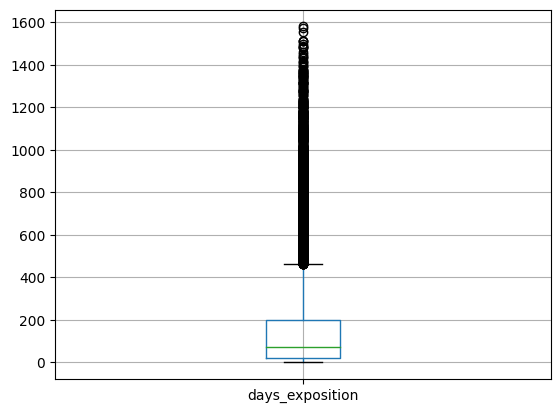

In [141]:
import matplotlib.pyplot as plt
data.boxplot(column='days_exposition')
plt.show()

In [142]:
data.days_exposition.describe()

count    23658.000000
mean       156.566362
std        213.545861
min          0.000000
25%         22.000000
50%         74.000000
75%        198.750000
max       1580.000000
Name: days_exposition, dtype: float64

(границы усов) или 1.5 межквартильный размах показывает, что все значения дней продажи, которые больше 464 дней - являются выбросами.

При этом:
- 25% продаются в первые 22 дня
- половина - в течение 74 дней
- 75% - продаются в течение  почти 200 дней

<font color='red'>

Итого: 
- быстрые продажи - до 22 дней
- необычно долгие - более 200 дней

</font>

        13. Теперь посмотрим на корреляцию цены (зависимая переменная) и предикторов

In [146]:

data_price_corr= data[['last_price', 'total_area','living_area', 
                       'kitchen_area', 'rooms', 'weekday_fd_exp', 'month_fd_exp', 'year_fd_exp', 'grouped_by_floor']]

data_price_corr


,last_price,total_area,living_area,kitchen_area,rooms,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor
0,13000000.0,108.00,51.0,25.00,3,3,3,2019,другой
1,3350000.0,40.40,18.6,11.00,1,1,12,2018,первый
2,5196000.0,56.00,34.3,8.30,2,3,8,2015,другой
3,64900000.0,159.00,NaN,NaN,3,4,7,2015,другой
4,10000000.0,100.00,32.0,41.00,2,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,73.3,13.83,3,1,3,2017,другой
23695,3100000.0,59.00,38.0,8.50,3,0,1,2018,другой
23696,2500000.0,56.70,29.7,NaN,2,6,2,2018,первый
23697,11475000.0,76.75,NaN,23.30,2,1,3,2017,другой


array([[<AxesSubplot: xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot: xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot: xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot: xlabel='weekday_fd_exp', ylabel='last_price'>,
        <AxesSubplot: xlabel='month_fd_exp', ylabel='last_price'>,
        <AxesSubplot: xlabel='year_fd_exp', ylabel='last_price'>],
       [<AxesSubplot: xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot: xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot: xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot: xlabel='weekday_fd_exp', ylabel='total_area'>,
        <AxesSubplot: xlabel='month_fd_exp', ylabel='total_area'>,
        <AxesSu

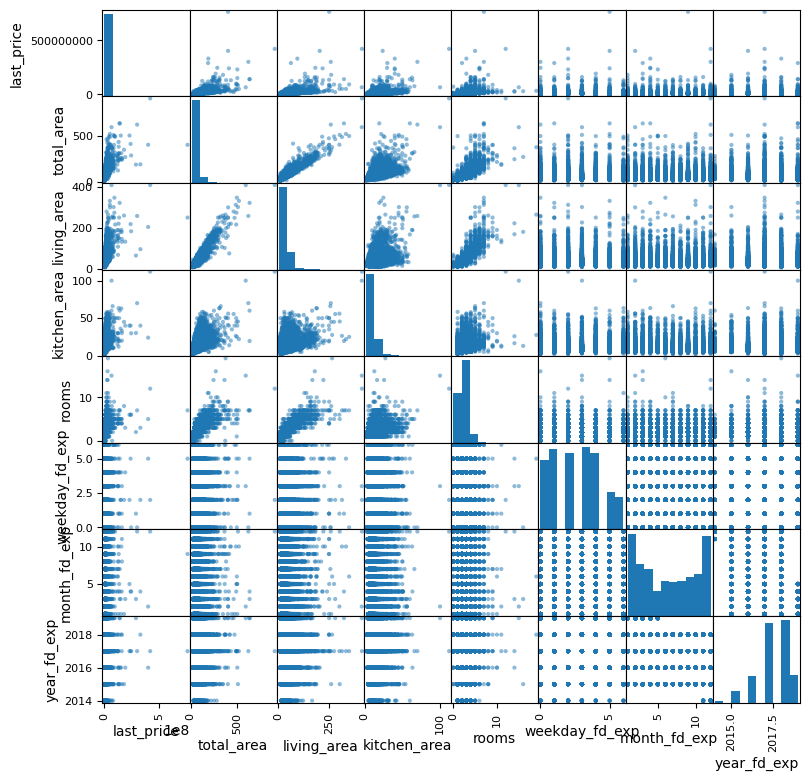

In [147]:
# построим график матрицы рассеияния 


pd.plotting.scatter_matrix(data_price_corr, figsize=(9,9))

Выглядит плохо, потому что строятся все пары в датасете. а мне нужна зависимость только одного параметра - цены

Лучше использовать матрицу корреляции и тепловую карту

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_40345/2363488110.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_price_corr.corr()


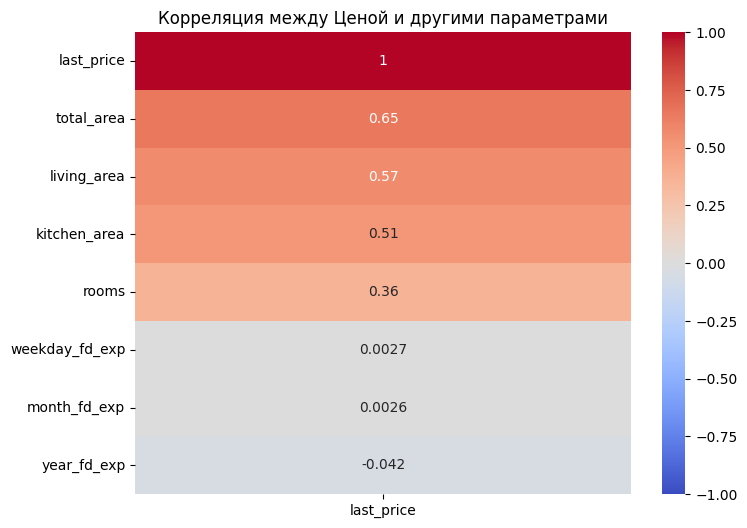

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляцию
correlation_matrix = data_price_corr.corr()

# Строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['last_price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между Ценой и другими параметрами')
plt.show()

<font color='red'>

Вывод: 

1) цена сильнее всего зависит от площади (общей, жилой, кухни) и числа комнат - но это и так понятно, все эти величины коррелируют и между собой, потому что взаимозависимы.

2) и не зависит от того, когда квартира выставляется (ни день, ни месяц, ни год не влияют) - тоже ничего удивительного

</font>

        14. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [150]:
data.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_m', 'weekday_fd_exp',
       'month_fd_exp', 'year_fd_exp', 'grouped_by_floor', 'planning_factor'],
      dtype='object')

In [155]:
data.groupby('locality_name').agg({'total_images':'count', 'price_per_sq_m': 'mean'})\
    .rename(columns={'total_images': 'num_appartments', 'price_per_sq_m': 'mean_price_per_sq_m'})\
    .sort_values(['num_appartments','mean_price_per_sq_m'] , ascending=False)\
    .head(10)

,num_appartments,mean_price_per_sq_m
locality_name,,
Санкт-Петербург,15686,114525.460830
Мурино,589,86061.676978
Кудрово,472,95324.930508
поселок Шушары,439,78703.263349
Всеволожск,398,68654.473970
Пушкин,366,102925.706311
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515


<font color='red'>

Вывод: 

1) возглавляет десятку самых популярных населенных пунктов (по числу объявлений) - конечно, Питер с самой высокой средней ценой квадратного метра - 114,5 тыс за 1м2

2) замыкает десятку самых популярных населенных пунктов - Выборг - кстати, с самой низкой средней ценой квадратного метра - 58 тыс руб за 1 м2

3) Интересную позицию занимает Пушкин - он всего лишь шестой по полуряности, однако со вторым по величине значением цены квадратного метра - почти 103 тыс руб за 1м2

</font>

        15. Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. 
        
        Учтем каждый километр расстояния: выясним среднюю цену квартир в одном километре от центра, в двух и так далее. Опишем, как стоимость объектов зависит от расстояния до центра города — с помощью графика изменения средней цены для каждого километра от центра Петербурга.

In [158]:
# lkz начала посмотрим какие вообще значения есть в столбце километража по столичному городу
sorted(data.query('locality_name == "Санкт-Петербург"').cityCenters_nearest.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 nan,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0]

присутствуют значения от 0 до 29 км

и есть пустые значения. Заполним пустые значения медианным, чтобы ничего не потерять


In [159]:
# сначала создадим глубокую копию (чтобы не трогать данные в основном датасете)
data_2 = data.copy(deep=True)
data_2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,weekday_fd_exp,month_fd_exp,year_fd_exp,grouped_by_floor,planning_factor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,0,120370.37,3,3,2019,другой,0.47
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,0.0,0.0,81,82920.79,1,12,2018,первый,0.46
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,0.61
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,796.0,3.0,381.0,0,72490.85,1,3,2017,другой,0.55
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,0.0,0.0,0.0,45,52542.37,0,1,2018,другой,0.64
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,0.0,0.0,0.0,0,44091.71,6,2,2018,первый,0.52
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,173.0,3.0,196.0,602,149511.40,1,3,2017,другой,NaN


In [160]:
# считаем медианное значение расстояния до центра питера
data_2.query('locality_name == "Санкт-Петербург"').cityCenters_nearest.median()

12.0

In [168]:
# заполняем медианным значением пропуски для питера

data_2.loc[(data_2.locality_name == "Санкт-Петербург") & (data_2.cityCenters_nearest.isna()),
           'cityCenters_nearest'] = 12

In [169]:
# проверим, что все отработало верно
data_2.query('locality_name == "Санкт-Петербург"').cityCenters_nearest.isna().sum()

0

Отлично, пустые значения по расстоянию исключили - но только для Питера

Займемся группировкой и вычислением средней цены квартир

In [171]:
mean_price_distance_spb= data_2.query('locality_name == "Санкт-Петербург"').\
    groupby('cityCenters_nearest').agg({'last_price': 'mean'})\
    .rename(columns={'last_price': 'mean_price'})

mean_price_distance_spb

,mean_price
cityCenters_nearest,
0.0,2.789127e+07
1.0,2.097744e+07
2.0,1.791577e+07
3.0,1.112658e+07
4.0,1.324117e+07
5.0,1.438974e+07
6.0,1.465074e+07
7.0,1.454368e+07
8.0,9.888648e+06


Так себе табличка, выразим цену в млн рублей с округлением до второго знака после запятой


In [172]:
mean_price_distance_spb.mean_price = round(mean_price_distance_spb.mean_price / 1_000_000, 2)
mean_price_distance_spb

,mean_price
cityCenters_nearest,
0.0,27.89
1.0,20.98
2.0,17.92
3.0,11.13
4.0,13.24
5.0,14.39
6.0,14.65
7.0,14.54
8.0,9.89


ну вот, теперь можно и график построить

<AxesSubplot: xlabel='cityCenters_nearest'>

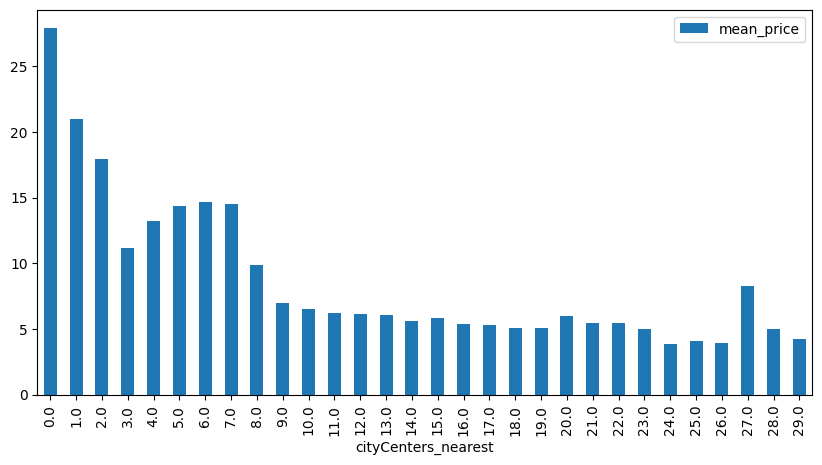

In [173]:
mean_price_distance_spb.plot(kind='bar', figsize=(10,5))

График не выглядит логичным: разумно предположить, что цена при постепенном отдалении от центра будет плавно снижаться.

а у нас есть неожиданные значения на 3, 20 и 27 километрах

<AxesSubplot: xlabel='cityCenters_nearest'>

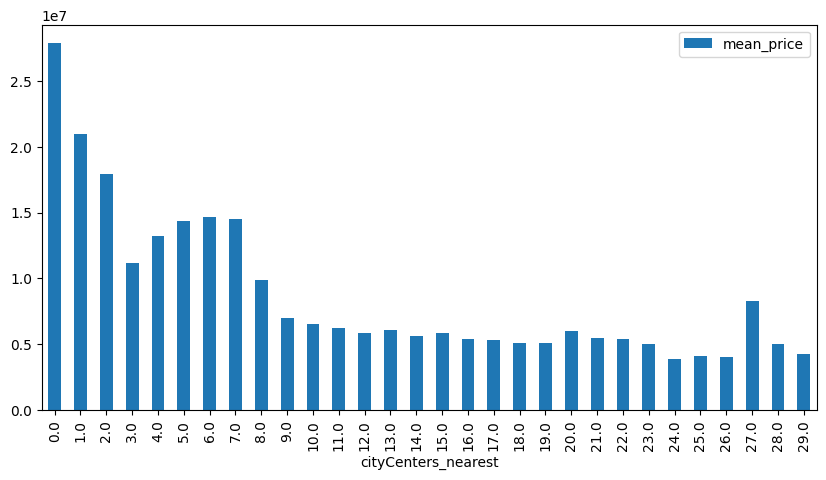

In [182]:
# посмотрим, что будет с графиком, если пустые значения не учитывать

data.query('locality_name == "Санкт-Петербург" & ~cityCenters_nearest.isna()').\
    groupby('cityCenters_nearest').agg({'last_price': 'mean'})\
    .rename(columns={'last_price': 'mean_price'})\
    .plot(kind='bar', figsize=(10,5))

Собственно, картинка существенно не изменилась. Значит это не влияние пустых значений, а какая-то аномалия

Возможные варианты 

1) именно на этих значениях удаленности от центра расположились дорогие/дешевые квартиры, которые дают такой всплекс аномальности

2) есть ошибки в данных по ценам (хотя мы постарались их максимально исключить)

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- []  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод